# Notebook 03 - Exploratory Data Analysis (EDA)

In this notebook, we will explore the cleaned dataset that we prepared earlier in Notebook 2 (02_Data_Loading_And_Preprocessing.ipynb). The dataset contains information about patients, including their age, gender, cognitive test scores, health status, and lifestyle habits.
Our goal is to understand how these different features relate to the diagnosis of Alzheimer’s disease. We will look at distributions, compare groups, and study relationships between variables to find out which features are most useful for predicting the risk of Alzheimer’s.


This step is important because it helps us decide which data to use in the machine learning model that we will build later in Notebook 4 (04_Model_Training_and_Evaluation). It also supports our overall project goal of using Business Intelligence and AI to help doctors identify people who might be at risk earlier.

## Understanding Values in the Cleaned Dataset

The dataset we are working with in this notebook is the cleaned version of the original Alzheimer’s dataset. All missing values have been handled, and the data has been structured to be ready for analysis and modeling. The features in this dataset represent different aspects of each patient’s background, health, and cognitive condition. Below is an overview of the key feature groups and what they represent:

### Patient Demographics
These columns describe the basic background of each patient.

- **PatientID:** A unique identifier for each patient. Not used in analysis.
- **Age:** The age of the patient, between 60 and 90. Older age is known to increase Alzheimer’s risk.
- **Gender:** Encoded as 0 for Male and 1 for Female. Some studies suggest Alzheimer’s may present differently across genders.
- **Ethnicity:** Coded as 0 (Caucasian), 1 (African American), 2 (Asian), or 3 (Other). Ethnic background may influence risk due to genetics or lifestyle factors.
- **EducationLevel:** From 0 (None) to 3 (Higher education). Higher education levels may be linked to better cognitive reserve.

### Lifestyle and Habits
These features capture behavior and lifestyle patterns that could affect brain health.

- **BMI:** Body Mass Index, indicating if a patient is underweight, normal, or overweight.
- **Smoking, AlcoholConsumption:** Binary or numerical indicators of substance use. Lifestyle risk factors like these may contribute to long-term cognitive changes.
- **PhysicalActivity, DietQuality, SleepQuality:** Weekly or scaled scores that measure how healthy the patient’s routine is. These can help us explore Hypothesis H3, which suggests that better habits are linked to lower Alzheimer’s risk.

### Medical History
This group tells us if a patient has had other health conditions often linked to Alzheimer’s risk.

- **FamilyHistoryAlzheimers:** Indicates a genetic link if present.
- **CardiovascularDisease, Diabetes, Hypertension, Depression, HeadInjury:** These are binary indicators (0 = No, 1 = Yes) for conditions that may contribute to brain health deterioration.

### Clinical Measurements
Standard health indicators taken during medical checkups.

- **SystolicBP, DiastolicBP:** Blood pressure readings. Uncontrolled blood pressure can impact brain health.
- **CholesterolTotal, LDL, HDL, Triglycerides:** Different types of cholesterol, which can influence cardiovascular and brain health.

### Cognitive and Functional Assessments
These are some of the most important features for Alzheimer’s diagnosis.

- **MMSE:** Mini-Mental State Exam score (0–30), where lower scores usually suggest cognitive decline.
- **CDR:** Clinical Dementia Rating, used by clinicians to classify severity.
- **FunctionalAssessment, ADL:** Measure how well a patient performs everyday tasks. Lower scores indicate greater difficulty.
- **MemoryComplaints, BehavioralProblems:** Reported symptoms that may reflect early or progressing cognitive decline.

### Symptoms
These binary columns indicate if the patient shows specific behavioral symptoms associated with Alzheimer’s.

- **Confusion, Disorientation, PersonalityChanges, DifficultyCompletingTasks, Forgetfulness:** These symptoms help describe how the disease is affecting day-to-day life.

### Diagnosis (Target Variable)
- **Diagnosis:** This is our target column for prediction. It is binary: 0 means the patient is not diagnosed with Alzheimer’s, and 1 means the patient has been diagnosed.

### Note
- **DoctorInCharge:** This column has been removed in the cleaned dataset, as it contains anonymized placeholder values and is not useful for analysis.

This cleaned version of the dataset provides a solid base for both statistical analysis and machine learning. By understanding the role of each feature, we can better identify which variables are likely to be most useful in predicting Alzheimer’s risk.

---------------------------------

## Research Questions

In this notebook, we will look into some of the main research questions from our project, using data analysis to explore and better understand them:

1. Can we predict the risk of Alzheimer's disease based on demographic and lifestyle factors such as age, gender, physical activity, and diet?
- We will look for clear patterns that separate patients with Alzheimer’s from those without.
- We will check if features like age, MMSE score, or physical activity are linked to diagnosis outcomes.


2. Which health and lifestyle features are most predictive of an Alzheimer’s diagnosis?
- We will explore which features show strong differences between groups and are good candidates for use in a prediction model.



---------------------------

## Set up Environment

In [3]:
# Ensure parent directory is in the path so "utils" can be imported
import sys
sys.path.append("..")

# Imports and initialization
from utils.setup_notebook import init_environment, load_csv, quick_overview
from utils.save_tools import save_plot, save_notebook_and_summary

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

# Initialize folders and styles
init_environment()

Environment setup complete.


-------------------------

## Load and Preview Data

In [9]:
import sys
sys.path.append("..")

from utils.setup_notebook import init_environment, load_csv, quick_overview
init_environment()

# Load cleaned dataset
df_clean = load_csv("../data/alzheimers_clean.csv")

# Show first few rows
df_clean.head()

Environment setup complete.
Loaded data from ../data/alzheimers_clean.csv with shape (2149, 33)


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0


In [11]:
# Quick structured overview
quick_overview(df_clean)

----- Dataset Shape -----
Rows: 2149, Columns: 33

----- Data Types and Non-Null Counts -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Columns: 33 entries, Age to Diagnosis
dtypes: float64(12), int64(21)
memory usage: 554.2 KB


None


----- Statistical Summary -----
This summary includes counts, mean, standard deviation, min, max, and percentiles for numeric and categorical columns.



,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,0.252210,0.144253,0.150768,0.200558,0.092601,0.148906,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,0.434382,0.351428,0.357906,0.400511,0.289940,0.356079,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862,29.991381,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



----- First 5 Rows -----


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0


### Output

The dataset includes a wide range of information for each patient, such as demographic details (like Age and Gender), clinical test scores (like MMSE and CDR), lifestyle habits, and health conditions.

By running a quick overview using descriptive statistics, we can check how many columns we have, what types of values are included, and whether the data looks clean and ready for analysis.

We see a full summary of the numeric features in our cleaned dataset. This includes useful values like the mean, standard deviation, minimum and maximum values, and the 25th, 50th (median), and 75th percentiles.

- Some columns, like Gender, Smoking, and Diagnosis, contain only values between 0 and 1. These are binary features, which tell us if a condition or behavior is present or not. For example, the mean of Diagnosis is about 0.35, meaning around 35% of the patients are diagnosed with Alzheimer’s.
- Other features, such as BMI, Age, and cholesterol values, have much wider ranges. These are continuous features and may need to be scaled later when we build machine learning models.

This output gives us a strong first impression of the data. It confirms that the structure looks correct, the values are complete, and that the cleaning done in Notebook 2 was successful. Now we are ready to move forward with deeper analysis and visualizations.


---------------------------

## Plot Histograms for Numeric Features

Below is some code we use to create a histogram for each numeric column in the dataset. It also adds a smooth curve (called KDE) to show the overall shape of the data. Each plot is saved so we can use it later, for example in our Streamlit dashboard. By looking at these plots, we can spot possible outliers, identify skewed features, and get a better sense of how the values are spread. This will help us decide whether we need to transform or scale the data before training machine learning models.

Numeric columns: ['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']


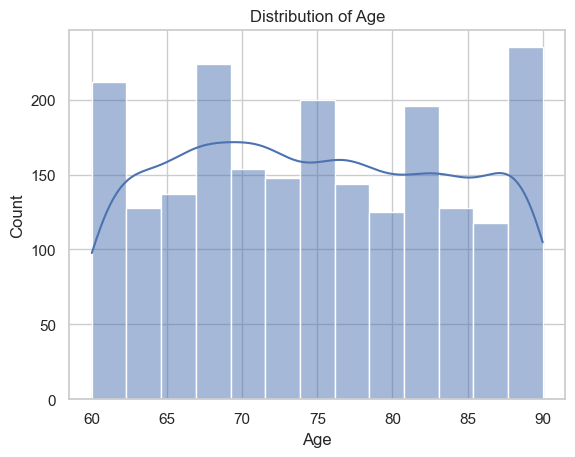

Plot saved to: ../plots/Age_distribution.png
Caption saved to: ../plots/Age_distribution.txt


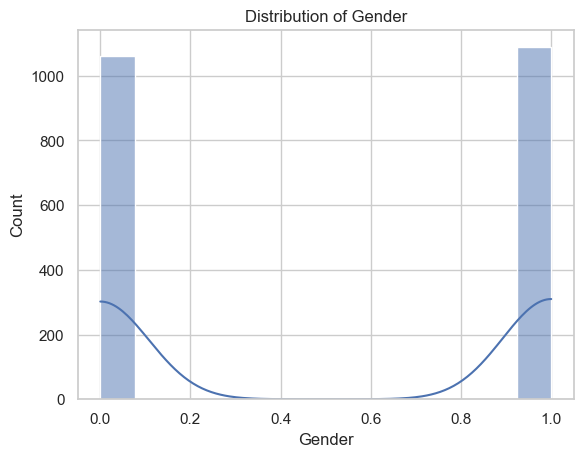

Plot saved to: ../plots/Gender_distribution.png
Caption saved to: ../plots/Gender_distribution.txt


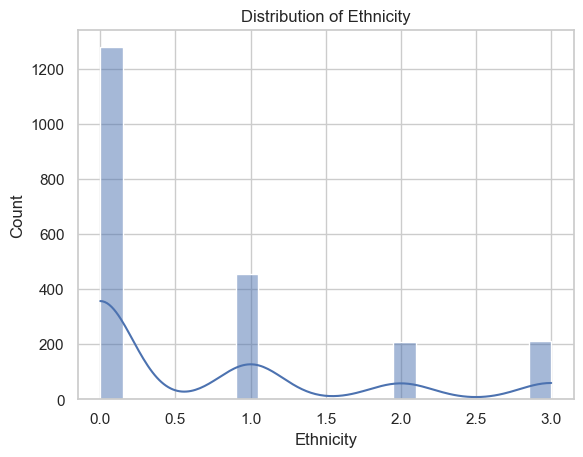

Plot saved to: ../plots/Ethnicity_distribution.png
Caption saved to: ../plots/Ethnicity_distribution.txt


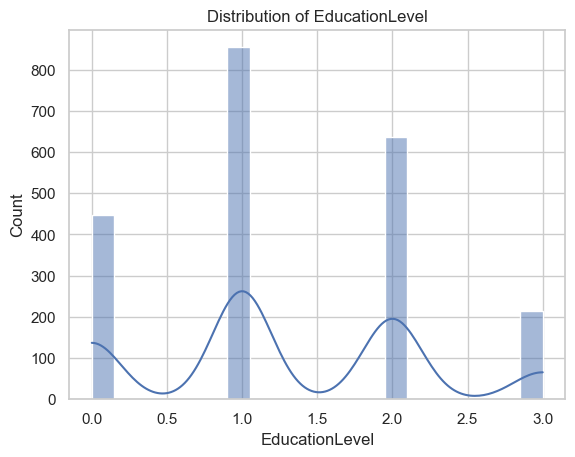

Plot saved to: ../plots/EducationLevel_distribution.png
Caption saved to: ../plots/EducationLevel_distribution.txt


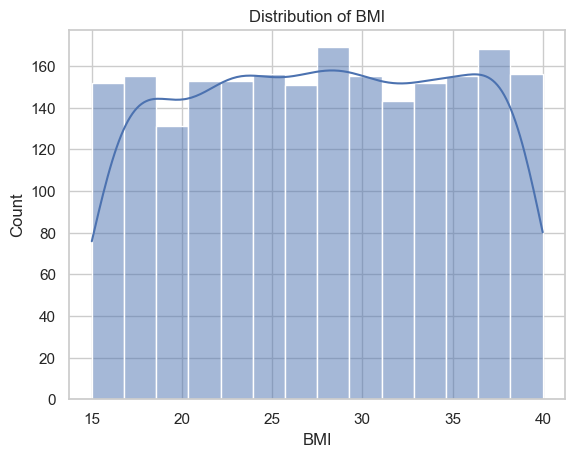

Plot saved to: ../plots/BMI_distribution.png
Caption saved to: ../plots/BMI_distribution.txt


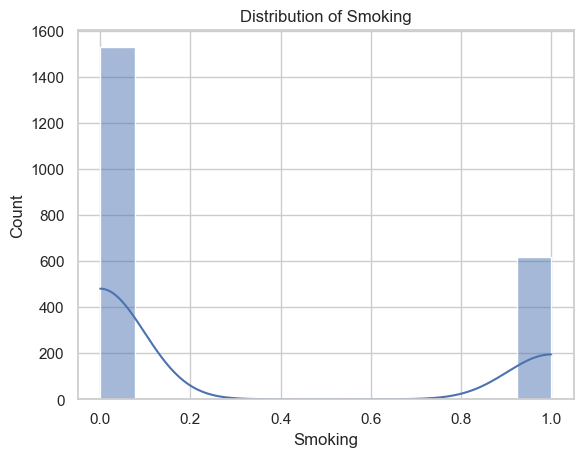

Plot saved to: ../plots/Smoking_distribution.png
Caption saved to: ../plots/Smoking_distribution.txt


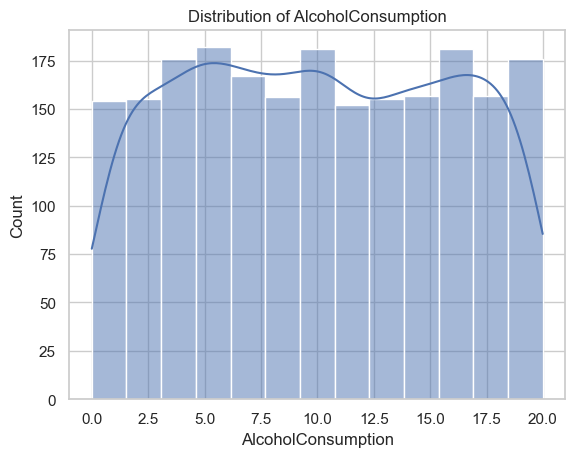

Plot saved to: ../plots/AlcoholConsumption_distribution.png
Caption saved to: ../plots/AlcoholConsumption_distribution.txt


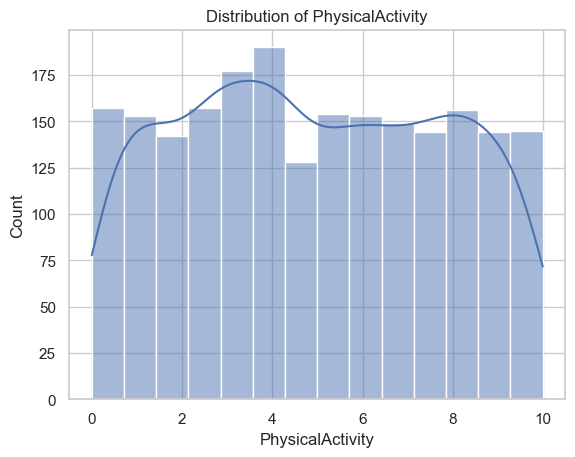

Plot saved to: ../plots/PhysicalActivity_distribution.png
Caption saved to: ../plots/PhysicalActivity_distribution.txt


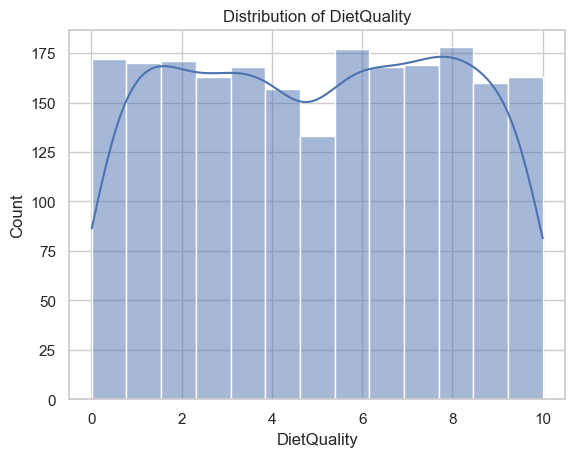

Plot saved to: ../plots/DietQuality_distribution.png
Caption saved to: ../plots/DietQuality_distribution.txt


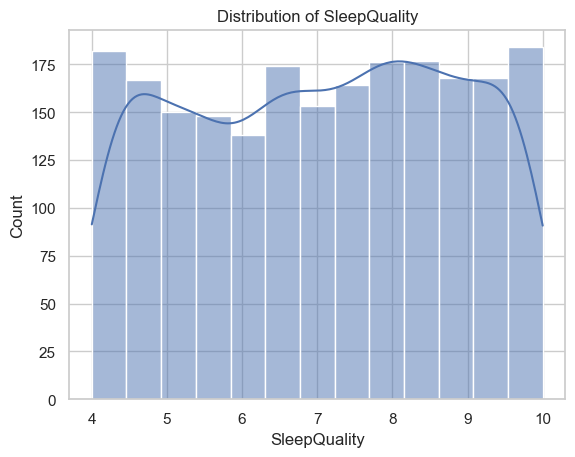

Plot saved to: ../plots/SleepQuality_distribution.png
Caption saved to: ../plots/SleepQuality_distribution.txt


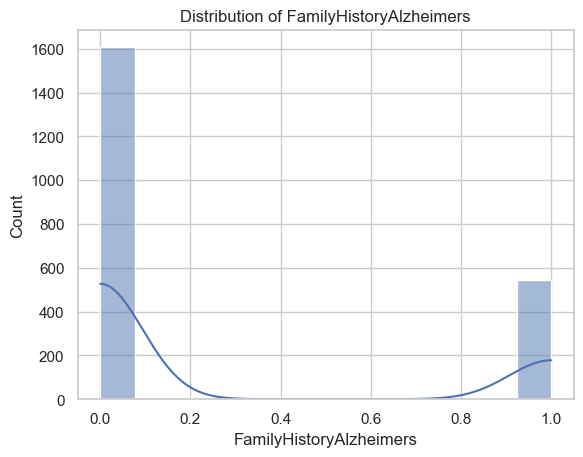

Plot saved to: ../plots/FamilyHistoryAlzheimers_distribution.png
Caption saved to: ../plots/FamilyHistoryAlzheimers_distribution.txt


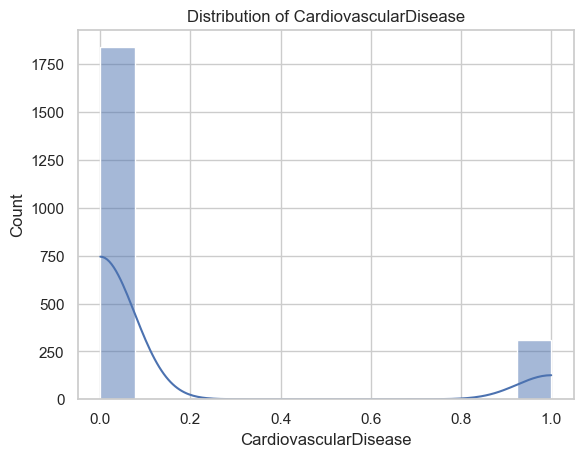

Plot saved to: ../plots/CardiovascularDisease_distribution.png
Caption saved to: ../plots/CardiovascularDisease_distribution.txt


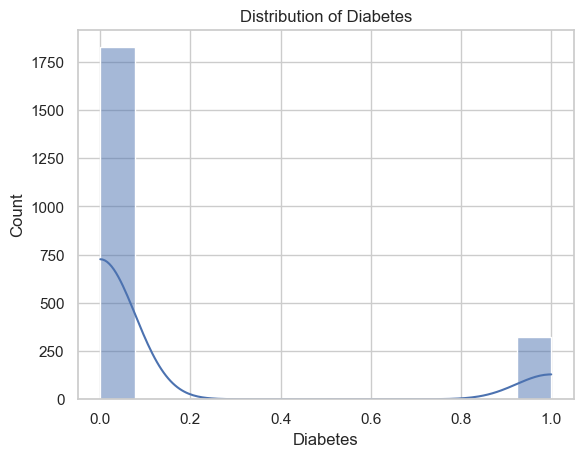

Plot saved to: ../plots/Diabetes_distribution.png
Caption saved to: ../plots/Diabetes_distribution.txt


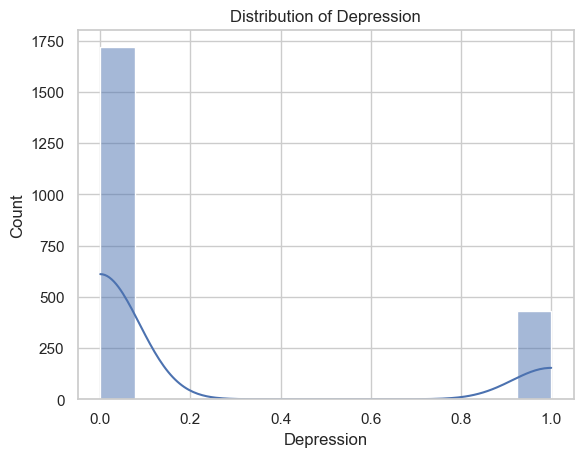

Plot saved to: ../plots/Depression_distribution.png
Caption saved to: ../plots/Depression_distribution.txt


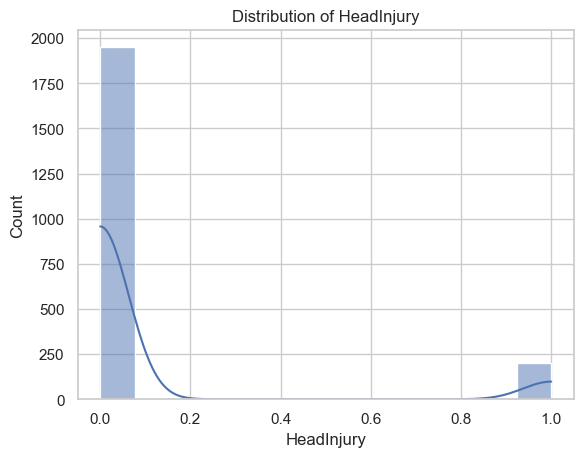

Plot saved to: ../plots/HeadInjury_distribution.png
Caption saved to: ../plots/HeadInjury_distribution.txt


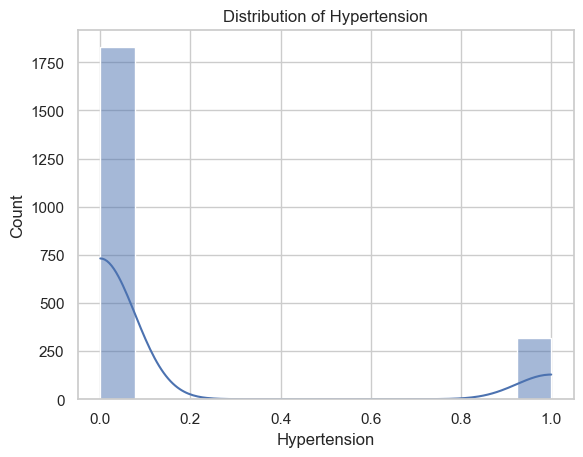

Plot saved to: ../plots/Hypertension_distribution.png
Caption saved to: ../plots/Hypertension_distribution.txt


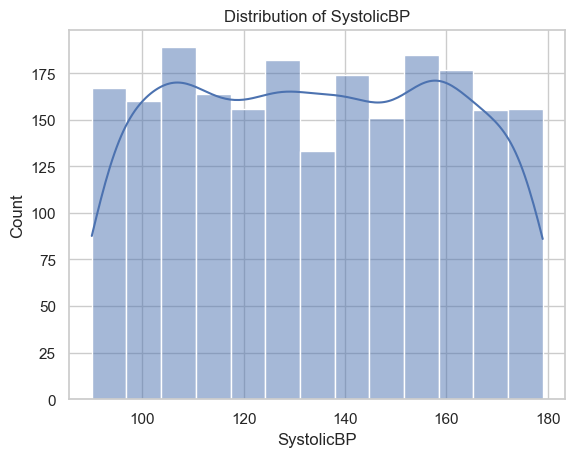

Plot saved to: ../plots/SystolicBP_distribution.png
Caption saved to: ../plots/SystolicBP_distribution.txt


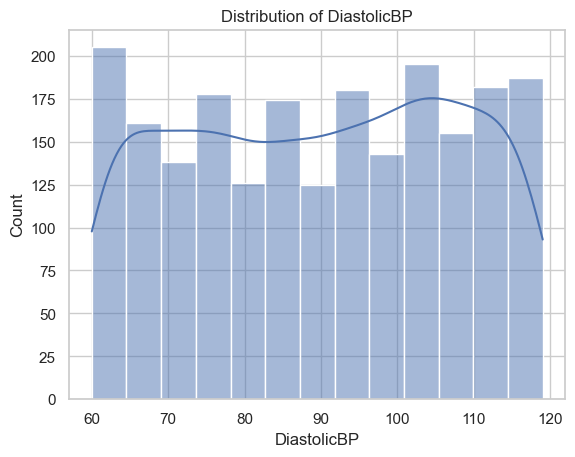

Plot saved to: ../plots/DiastolicBP_distribution.png
Caption saved to: ../plots/DiastolicBP_distribution.txt


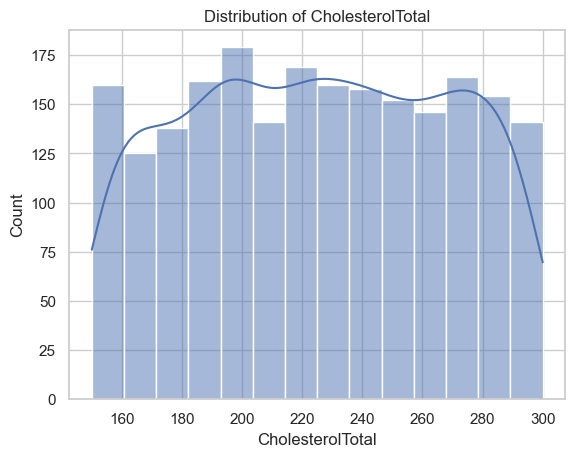

Plot saved to: ../plots/CholesterolTotal_distribution.png
Caption saved to: ../plots/CholesterolTotal_distribution.txt


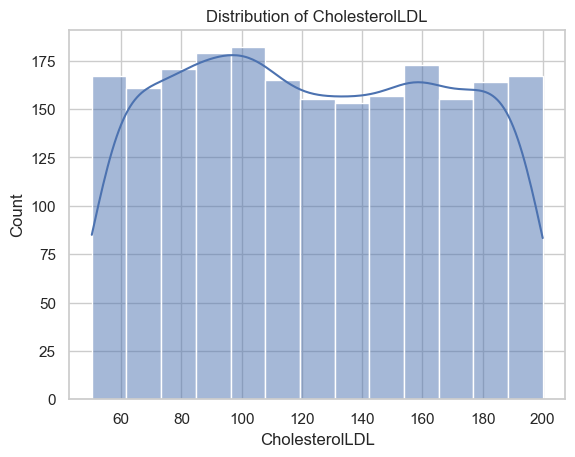

Plot saved to: ../plots/CholesterolLDL_distribution.png
Caption saved to: ../plots/CholesterolLDL_distribution.txt


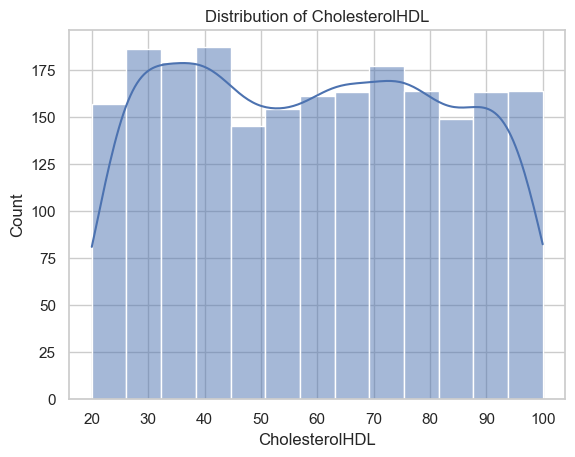

Plot saved to: ../plots/CholesterolHDL_distribution.png
Caption saved to: ../plots/CholesterolHDL_distribution.txt


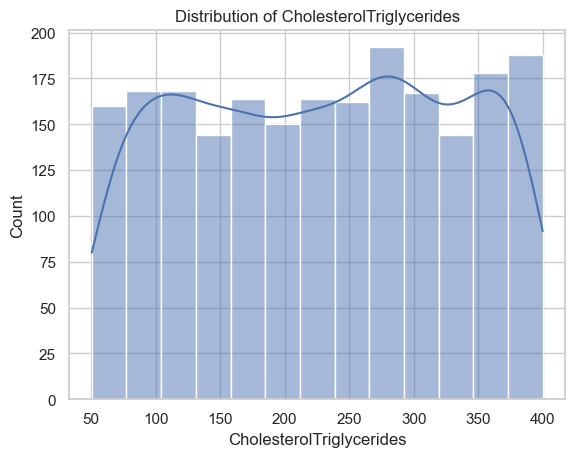

Plot saved to: ../plots/CholesterolTriglycerides_distribution.png
Caption saved to: ../plots/CholesterolTriglycerides_distribution.txt


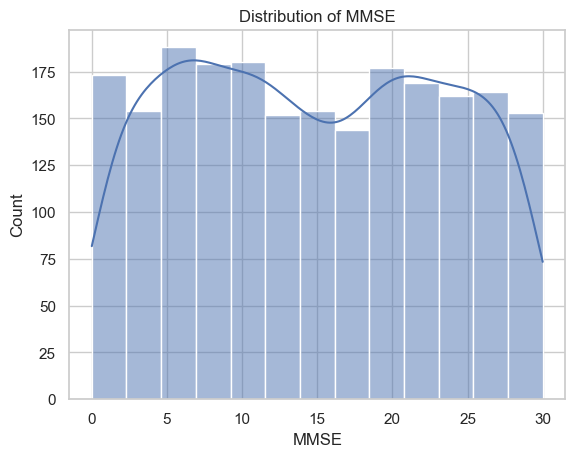

Plot saved to: ../plots/MMSE_distribution.png
Caption saved to: ../plots/MMSE_distribution.txt


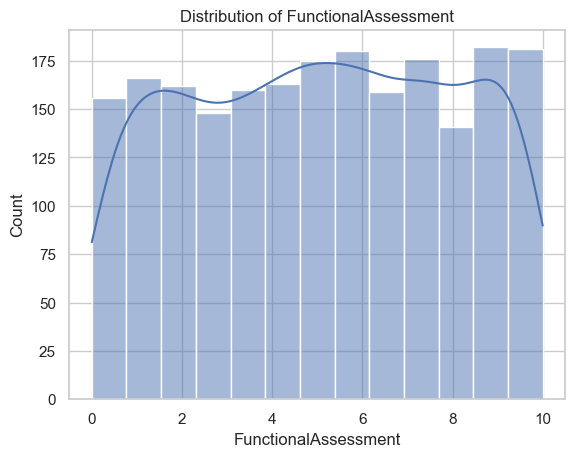

Plot saved to: ../plots/FunctionalAssessment_distribution.png
Caption saved to: ../plots/FunctionalAssessment_distribution.txt


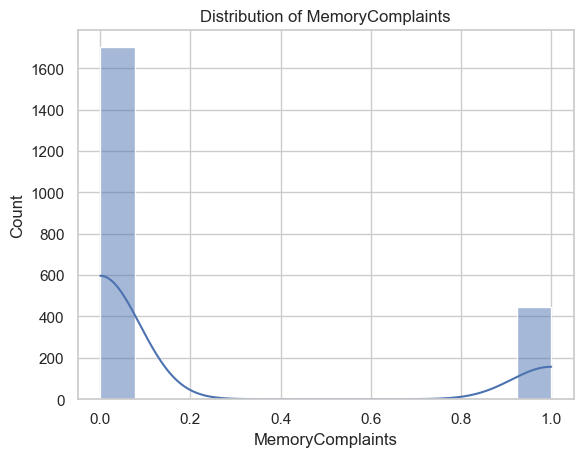

Plot saved to: ../plots/MemoryComplaints_distribution.png
Caption saved to: ../plots/MemoryComplaints_distribution.txt


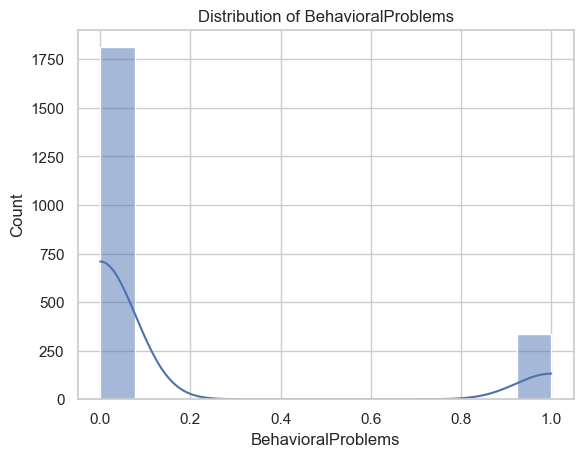

Plot saved to: ../plots/BehavioralProblems_distribution.png
Caption saved to: ../plots/BehavioralProblems_distribution.txt


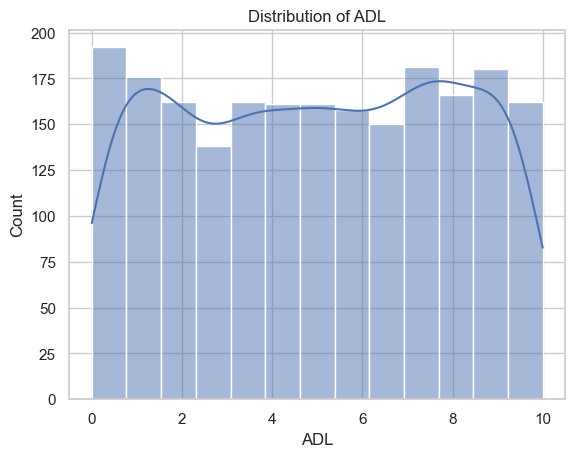

Plot saved to: ../plots/ADL_distribution.png
Caption saved to: ../plots/ADL_distribution.txt


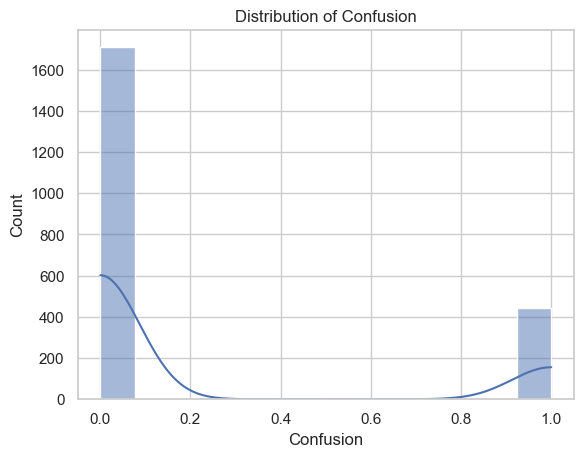

Plot saved to: ../plots/Confusion_distribution.png
Caption saved to: ../plots/Confusion_distribution.txt


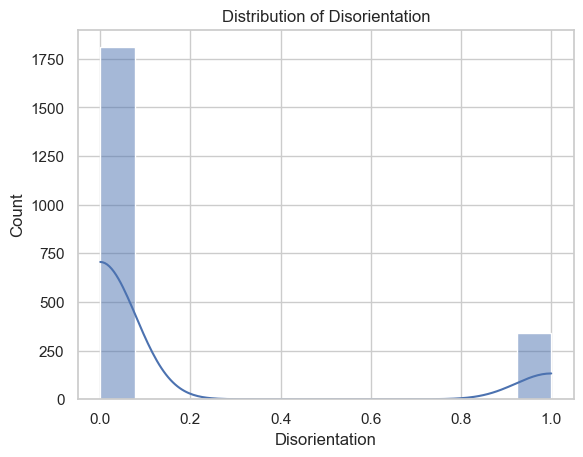

Plot saved to: ../plots/Disorientation_distribution.png
Caption saved to: ../plots/Disorientation_distribution.txt


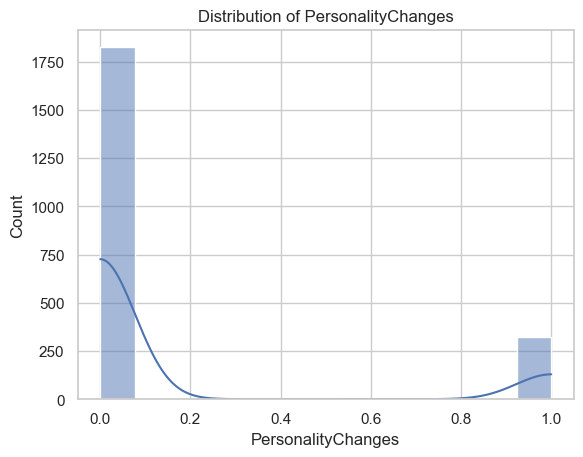

Plot saved to: ../plots/PersonalityChanges_distribution.png
Caption saved to: ../plots/PersonalityChanges_distribution.txt


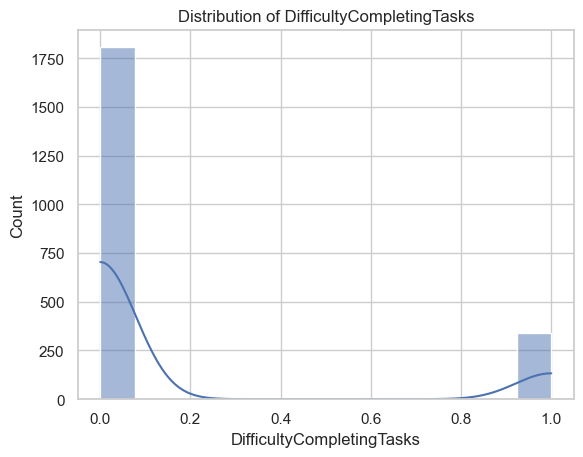

Plot saved to: ../plots/DifficultyCompletingTasks_distribution.png
Caption saved to: ../plots/DifficultyCompletingTasks_distribution.txt


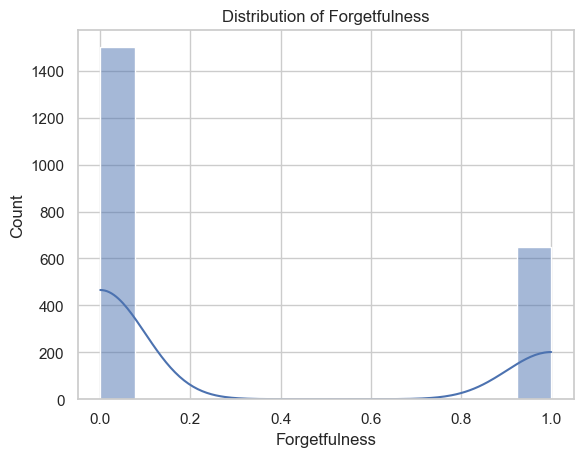

Plot saved to: ../plots/Forgetfulness_distribution.png
Caption saved to: ../plots/Forgetfulness_distribution.txt


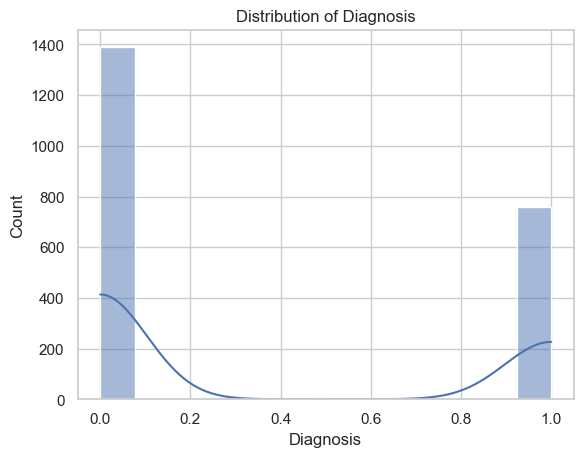

Plot saved to: ../plots/Diagnosis_distribution.png
Caption saved to: ../plots/Diagnosis_distribution.txt


In [25]:
# Get all numeric columns
numeric_cols = df_clean.select_dtypes(include=np.number).columns.tolist()
print("Numeric columns:", numeric_cols)

# Plot distribution of each numeric column
for col in numeric_cols:
    fig, ax = plt.subplots()
    sns.histplot(df_clean[col], kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")
    plt.show()
    save_plot(fig, f"{col}_distribution.png", caption=f"Distribution of {col}")

#### Full Overview

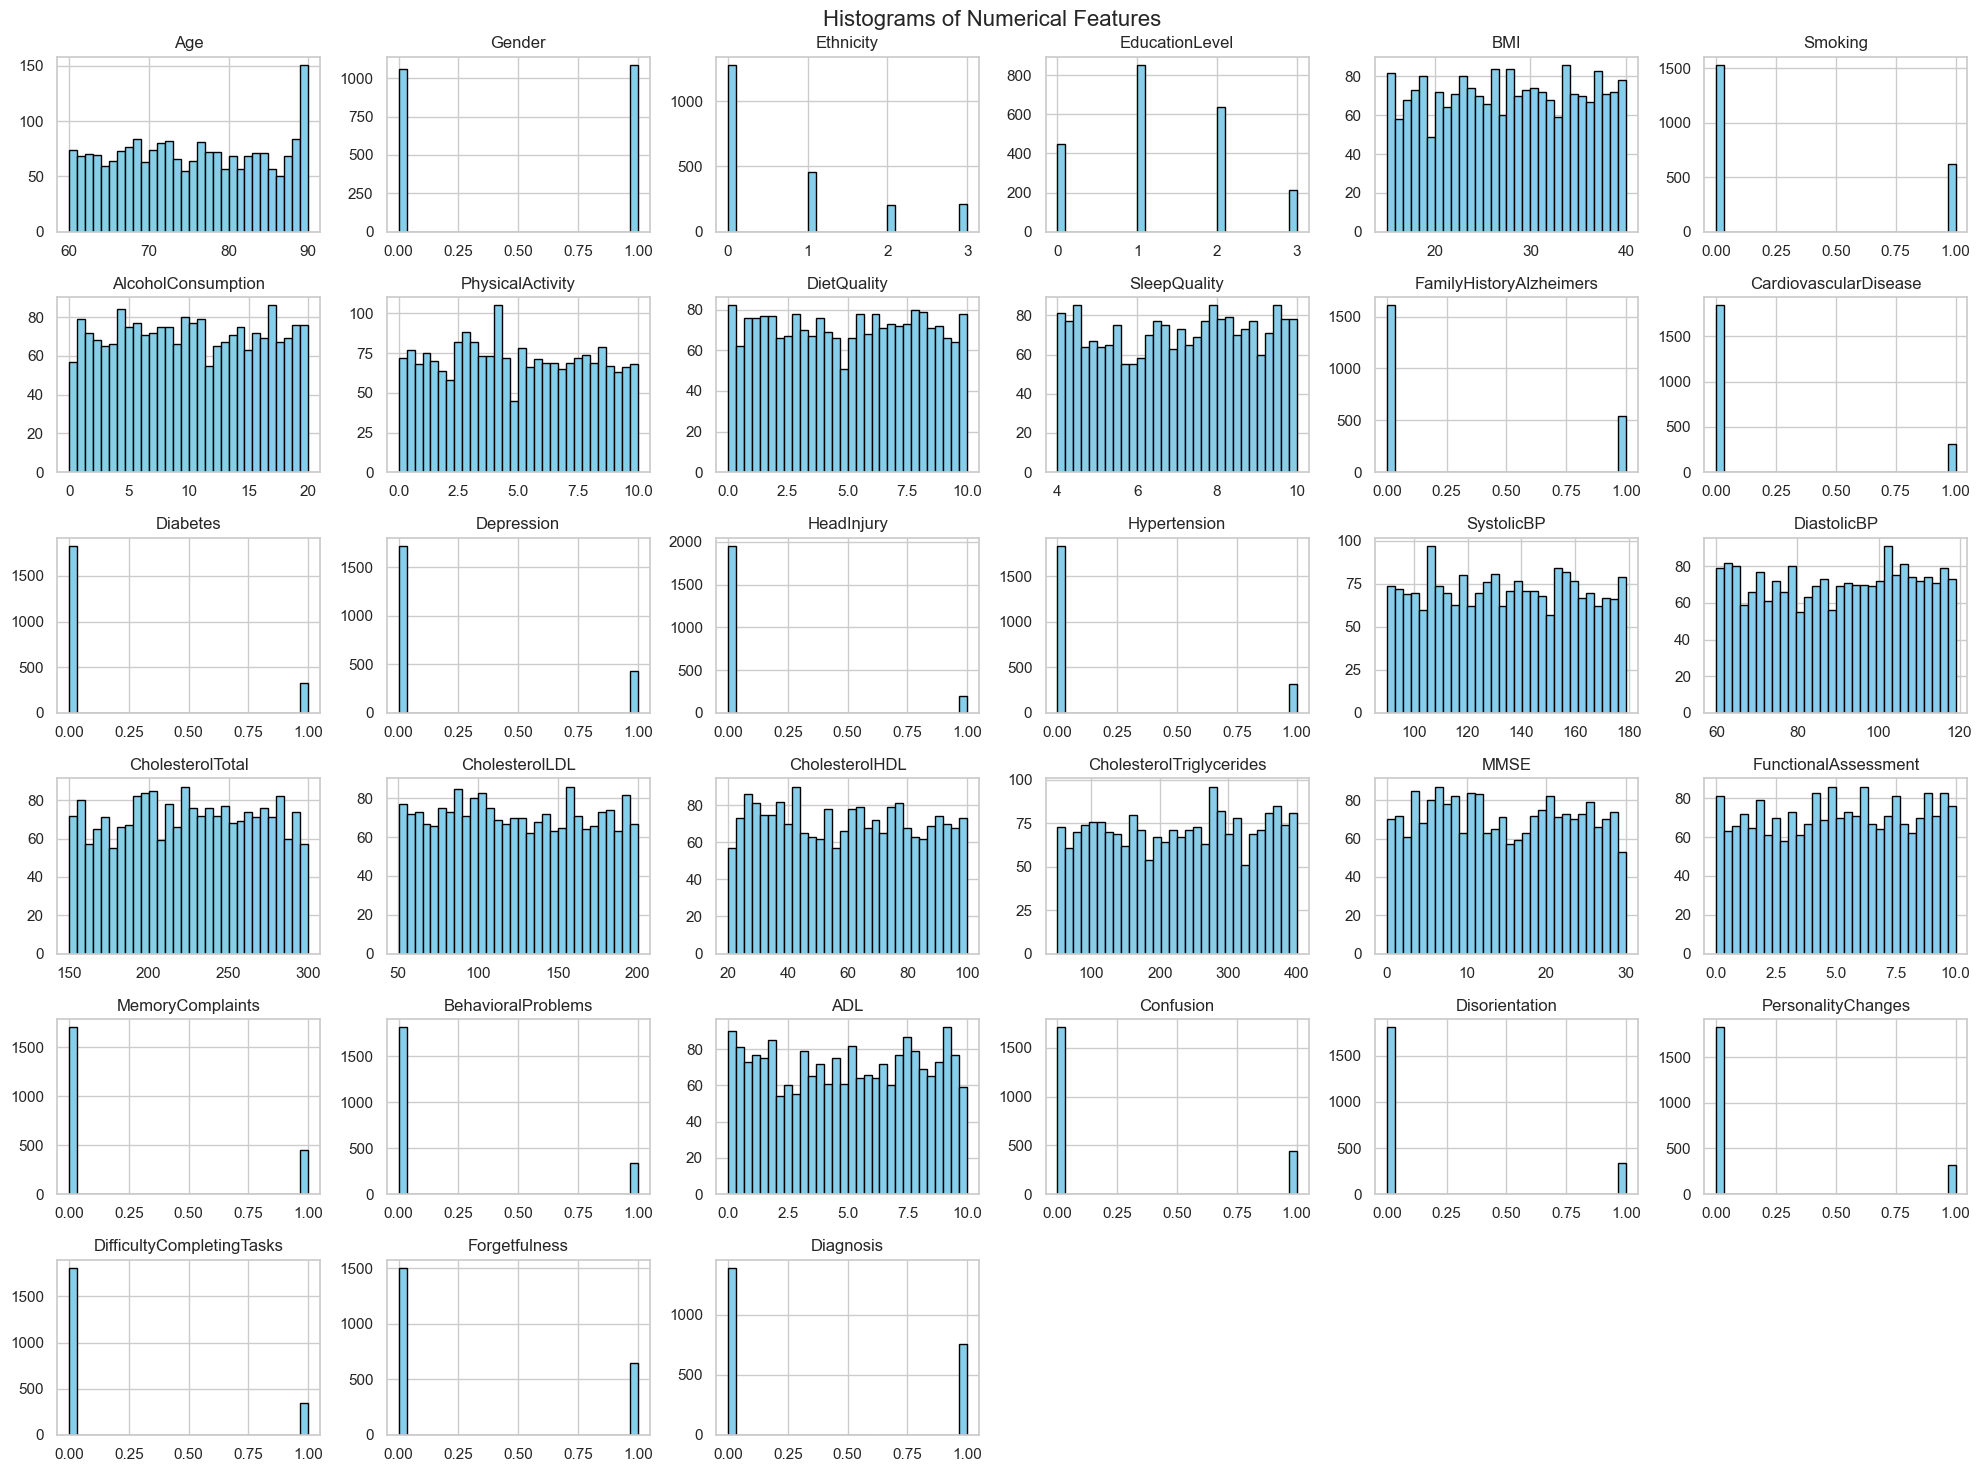

In [29]:
# Plot histograms of numeric features
df_clean.select_dtypes(include=['int64', 'float64']).hist(figsize=(20, 15), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

### Output
The histograms we created show how each feature in the cleaned dataset is distributed. This helps us understand the patterns in the data before using it to train a machine learning model. By studying the shape of each distribution, we can see whether values are evenly spread, skewed, or grouped in certain ranges. This information is useful for feature selection, data transformation, and understanding how different factors relate to Alzheimer’s risk.
We also compare what we see in the histograms with our project hypotheses and research questions.

#### Demographic and Lifestyle Features
- Age shows a nearly bell-shaped distribution, centered around the mid-70s. This supports Hypothesis H1, which expects higher Alzheimer’s risk in older patients. The wide spread across ages gives us a good chance to observe risk differences by age group.
- Gender is split fairly evenly between male and female, which helps prevent gender bias in our models.
- EducationLevel is concentrated around levels 1 and 2 (High School and Bachelor’s), and may reflect differences in cognitive reserve. People with more education may be better at coping with early symptoms, which is useful for understanding diagnosis patterns.
- BMI is somewhat normally distributed, with most patients in the healthy or overweight range. There are no extreme outliers, which makes it suitable for modeling without transformation.
- PhysicalActivity, DietQuality, and SleepQuality are skewed slightly toward higher scores. These distributions suggest that most patients report relatively healthy habits. This will help us test Hypothesis H3, where better lifestyle scores are expected to be linked with lower Alzheimer’s risk.
- Smoking and AlcoholConsumption both show clear spikes at lower values (0 or 1), meaning most people do not smoke and drink little, but the spread is still wide enough to compare groups.

#### Medical History and Clinical Metrics
- Binary health conditions like Hypertension, Diabetes, Depression, and HeadInjury show two bars (0 and 1), with most values at 0. Even though these features are imbalanced, they are still useful because we have enough positive cases (1s) to detect possible health-related risks.
- FamilyHistoryAlzheimers is also binary, and a noticeable number of patients report a family history, which may increase their risk.
- Clinical measurements like SystolicBP and DiastolicBP are normally distributed, forming smooth bell curves. This is a good sign of data quality and means we will not need to fix outliers or apply scaling immediately.
- Cholesterol features (Total, HDL, LDL, Triglycerides) are also well distributed and follow expected medical patterns. These values may show indirect connections to cognitive health.

#### Cognitive and Functional Assessments
- MMSE is a key variable and shows a wide spread across the full scale (0–30), but most values are clustered near the higher end. This makes sense because most patients are not yet in severe stages, and it confirms Hypothesis H2: lower MMSE scores likely indicate higher Alzheimer’s risk.
- FunctionalAssessment and ADL also show gradual decline in some patients. These features help us capture changes in day-to-day functioning, which is a key part of understanding diagnosis stages.

#### Symptoms and Behavioral Indicators
- Binary symptom features like MemoryComplaints, Confusion, Disorientation, PersonalityChanges, and BehavioralProblems are mostly 0, but each has a noticeable number of 1 values. These symptoms are often early signs of cognitive problems, so they may help the model detect early risk even before test scores drop.

#### Diagnosis (Target Variable)
- The Diagnosis column shows that about 64 percent of patients are not diagnosed with Alzheimer’s, and 36 percent are. This is a mild class imbalance, which we will need to keep in mind when building our models. We can address this using stratified sampling or balanced accuracy scores during evaluation.

### Summary
- Most numeric features show smooth, bell-shaped or slightly skewed distributions. This suggests that our data is clean and ready to use.
- Binary features have clear separation between 0 and 1, helping us measure presence or absence of health conditions and symptoms.
- The shapes of the histograms (bell curves, spikes, or skewed distributions) help us decide whether we need to scale or transform any features before modeling.
- The data supports all three of our project hypotheses:
  - H1: Older patients appear more likely to be diagnosed with Alzheimer’s.
  - H2: Lower MMSE scores and functional scores are likely linked to diagnosis.
  - H3: Healthier lifestyle habits could play a protective role.

-------------------------

## Boxplots – All Numeric Variables

We first tried creating a boxplot of all numeric features in the dataset. Boxplots are useful for showing the distribution of values, including the median, quartiles, and possible outliers.

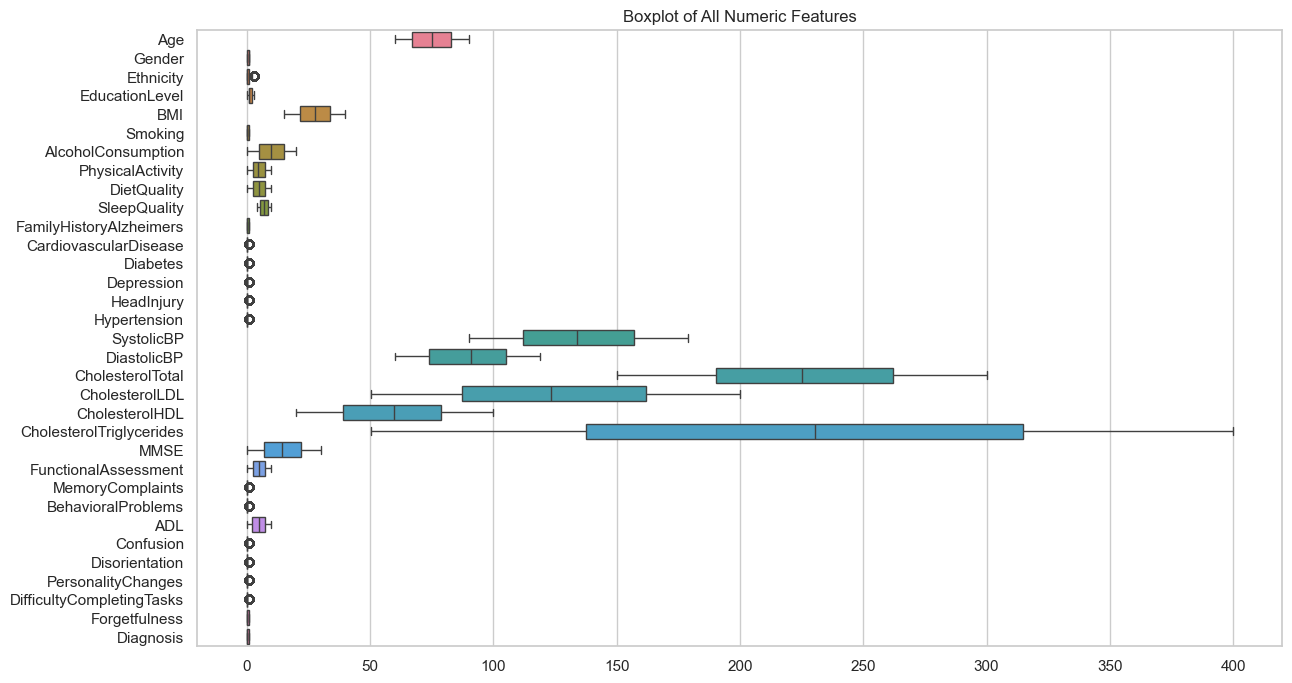

In [34]:
# Boxplot of all numeric variables
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_clean.select_dtypes(include='number'), orient="h")
plt.title("Boxplot of All Numeric Features")
plt.show()

### Output

This combined boxplot includes all numeric features in one figure, but it is difficult to interpret because the features are on very different scales. For example, some values like cholesterol or blood pressure go well above 100, while others — like binary features (0 or 1) — have much smaller ranges.

As a result, many of the boxes appear squished or hard to see. This makes it difficult to compare the spread or detect outliers for most variables.

This shows that plotting all numeric features together is not very helpful when the value ranges are so different. To get more useful insights, it is better to create separate boxplots for individual features or for groups of features with similar scales.


## Boxplots – Selected Continuous Features

To make the boxplots easier to read, we selected only a few continuous features that are measured on similar scales. This helps us better understand how the values are spread out, where the medians fall, and whether any outliers are present.

We focused on variables like BMI, PhysicalActivity, DietQuality, and several cholesterol-related features. These are all numeric, continuous, and relevant to our project goals — especially for testing Hypothesis 3 about the impact of lifestyle and health on Alzheimer’s risk.

By limiting the plot to these features, we get a clearer and more meaningful visualization that allows us to compare values across patients more effectively.

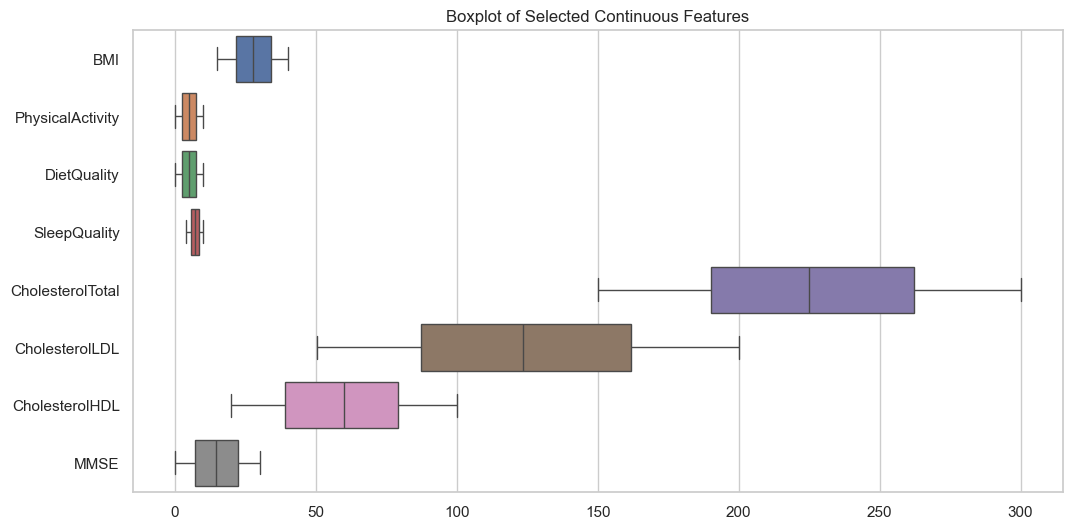

In [50]:
# Select continuous numeric columns for clearer boxplots
columns_to_plot = [
    "BMI", "PhysicalActivity", "DietQuality", "SleepQuality",
    "CholesterolTotal", "CholesterolLDL", "CholesterolHDL", "MMSE"
]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean[columns_to_plot], orient="h")
plt.title("Boxplot of Selected Continuous Features")
plt.show()

### Output

These boxplots give us a much clearer and more balanced view of how the selected continuous features are spread out. After applying the log transformation, the differences between low and high values are easier to compare, and extreme values no longer stretch the scale as much.

We can now more clearly see the middle 50% of values (the box), the overall range, and any potential outliers for each variable. Features like CholesterolLDL and MMSE still show wider variation across patients, while others — such as PhysicalActivity, DietQuality, and SleepQuality — are more concentrated in a smaller range.

This transformation helps us better compare features side by side, even if they originally had very different scales. It also prepares these features for modeling, especially if we plan to use algorithms that are sensitive to skewed data or large value differences.


## Boxplots – Log-Transformed Features

To make the boxplots even easier to read, we applied a log transformation to the selected features. This is useful when some values are much larger than others, which can make the plots harder to compare.

The log transformation helps by compressing higher values and spreading out lower values. This reduces skew in the data and allows us to better see patterns across features that originally had different scales.

We used the formula log(1 + x), which is a common approach that also works for values close to zero. This makes it safe and effective for visualizing medical and lifestyle data.

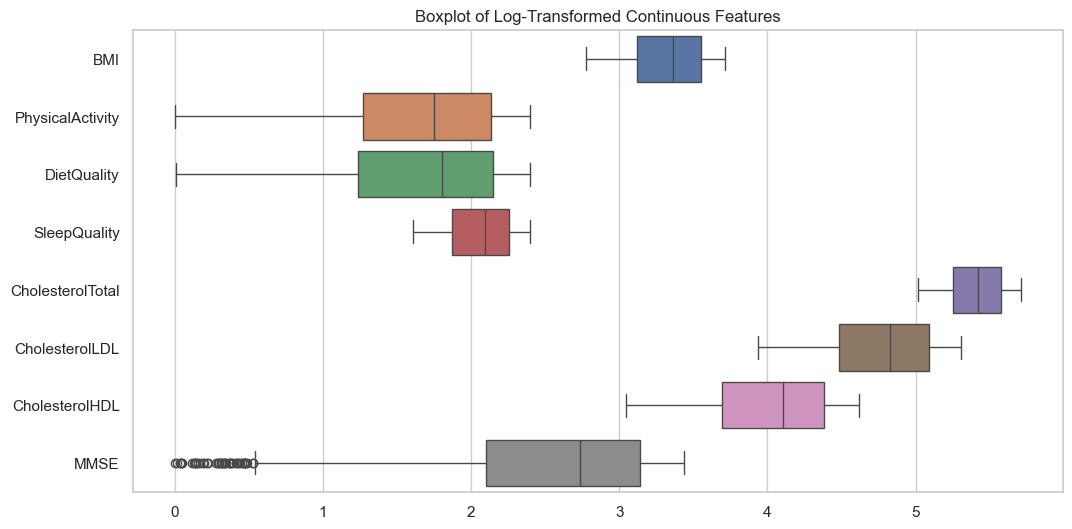

In [54]:
# Apply log transform to reduce skew before plotting
import numpy as np

df_log = df_clean[columns_to_plot].apply(lambda x: np.log1p(x))  # log(1 + x)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_log, orient="h")
plt.title("Boxplot of Log-Transformed Continuous Features")
plt.show()

### Output

The log-transformed boxplots give us a more balanced and readable view of the continuous features. By compressing larger values and stretching smaller ones, the transformation helps reduce skew and makes patterns in the data easier to see.

We can now compare features more fairly on a similar scale. For example, MMSE originally had a wide spread and looked uneven, but after transformation, we can clearly see the distribution and any outliers. The same improvement is noticeable for cholesterol features like CholesterolTotal and CholesterolLDL.

This confirms that log transformation is a useful tool for handling skewed data. It not only improves visualization but also helps prepare features for machine learning models that are sensitive to value ranges or non-normal distributions.

## Boxplots by Feature
Boxplots are useful for spotting outliers, which may affect modeling.

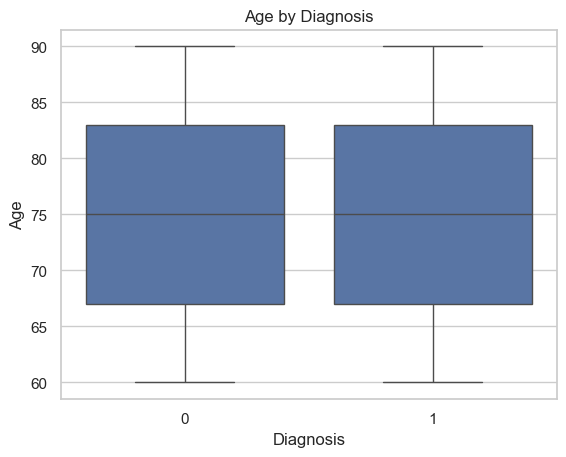

Plot saved to: ../plots/Age_boxplot.png
Caption saved to: ../plots/Age_boxplot.txt


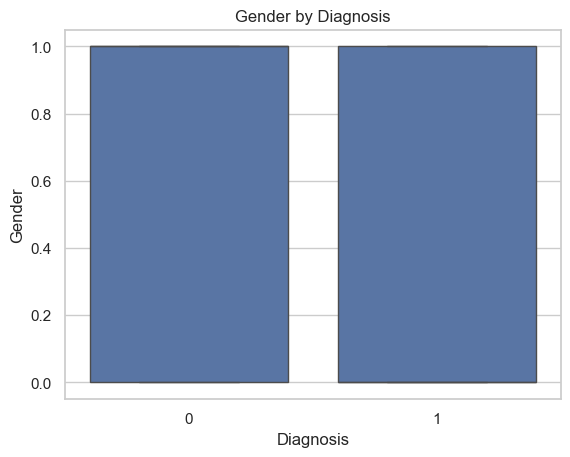

Plot saved to: ../plots/Gender_boxplot.png
Caption saved to: ../plots/Gender_boxplot.txt


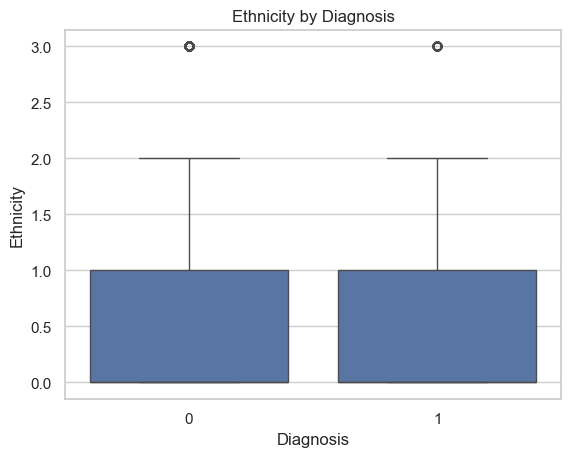

Plot saved to: ../plots/Ethnicity_boxplot.png
Caption saved to: ../plots/Ethnicity_boxplot.txt


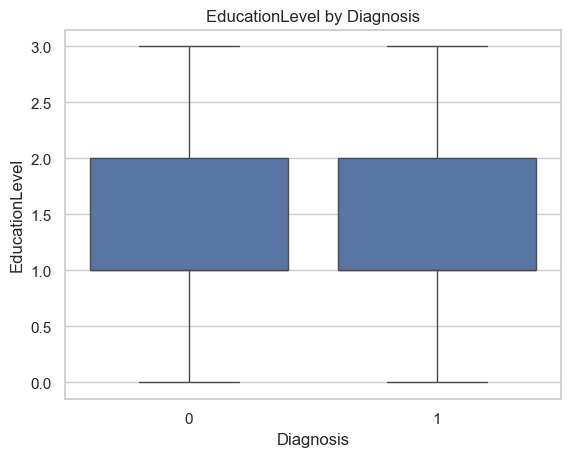

Plot saved to: ../plots/EducationLevel_boxplot.png
Caption saved to: ../plots/EducationLevel_boxplot.txt


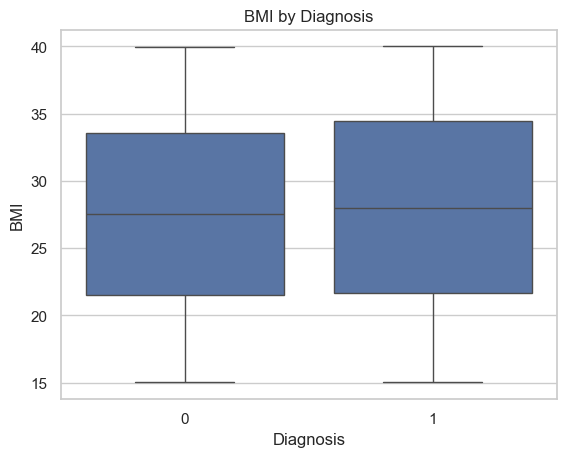

Plot saved to: ../plots/BMI_boxplot.png
Caption saved to: ../plots/BMI_boxplot.txt


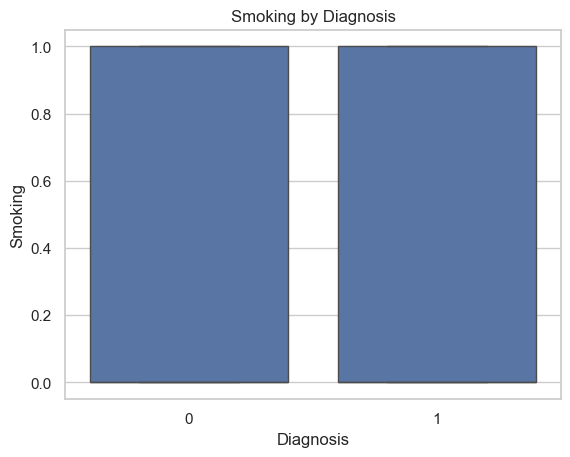

Plot saved to: ../plots/Smoking_boxplot.png
Caption saved to: ../plots/Smoking_boxplot.txt


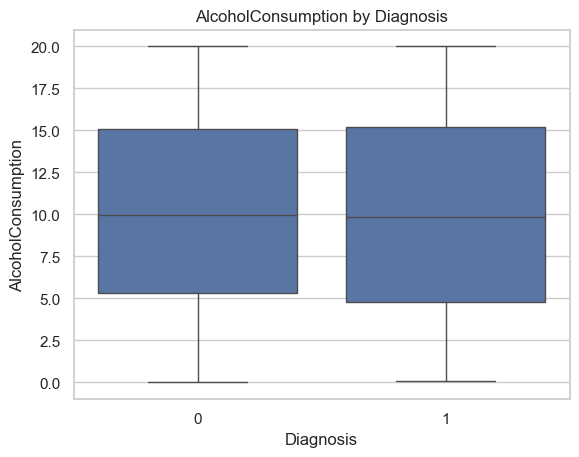

Plot saved to: ../plots/AlcoholConsumption_boxplot.png
Caption saved to: ../plots/AlcoholConsumption_boxplot.txt


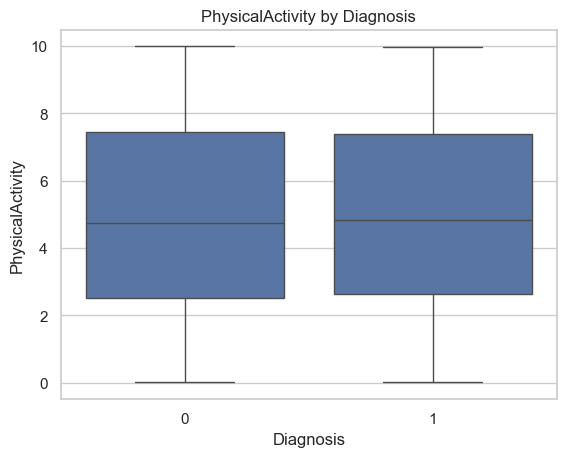

Plot saved to: ../plots/PhysicalActivity_boxplot.png
Caption saved to: ../plots/PhysicalActivity_boxplot.txt


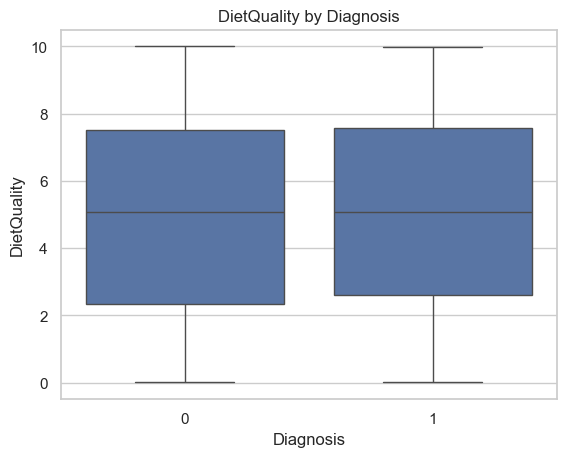

Plot saved to: ../plots/DietQuality_boxplot.png
Caption saved to: ../plots/DietQuality_boxplot.txt


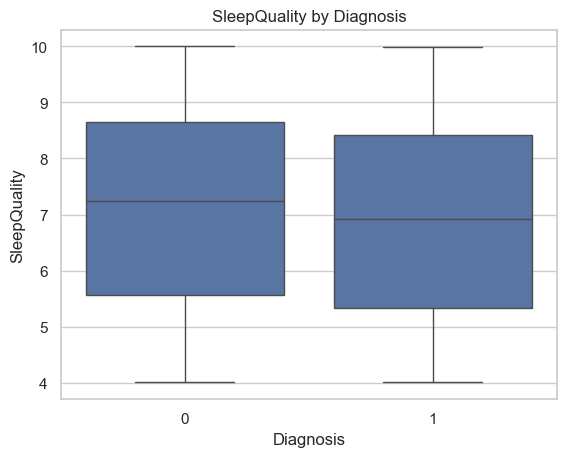

Plot saved to: ../plots/SleepQuality_boxplot.png
Caption saved to: ../plots/SleepQuality_boxplot.txt


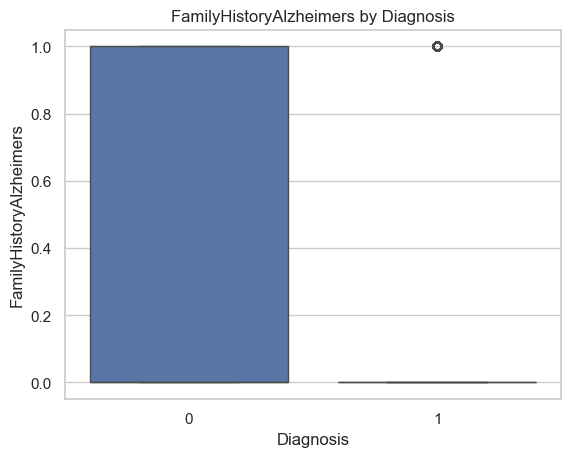

Plot saved to: ../plots/FamilyHistoryAlzheimers_boxplot.png
Caption saved to: ../plots/FamilyHistoryAlzheimers_boxplot.txt


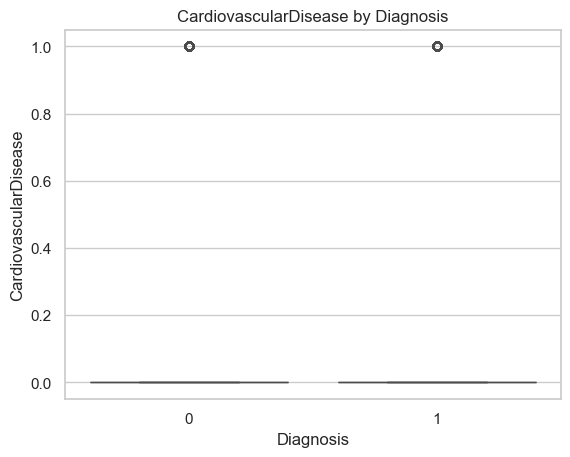

Plot saved to: ../plots/CardiovascularDisease_boxplot.png
Caption saved to: ../plots/CardiovascularDisease_boxplot.txt


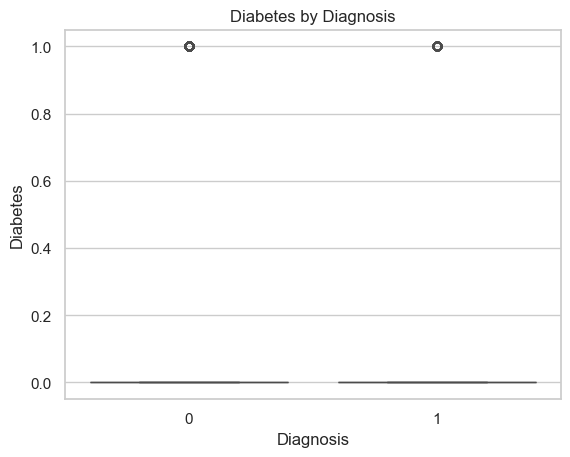

Plot saved to: ../plots/Diabetes_boxplot.png
Caption saved to: ../plots/Diabetes_boxplot.txt


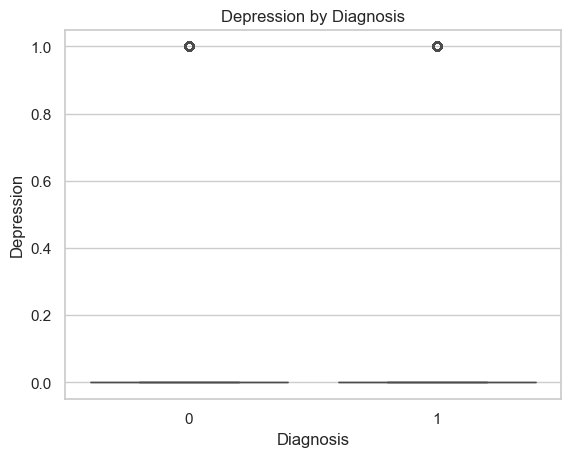

Plot saved to: ../plots/Depression_boxplot.png
Caption saved to: ../plots/Depression_boxplot.txt


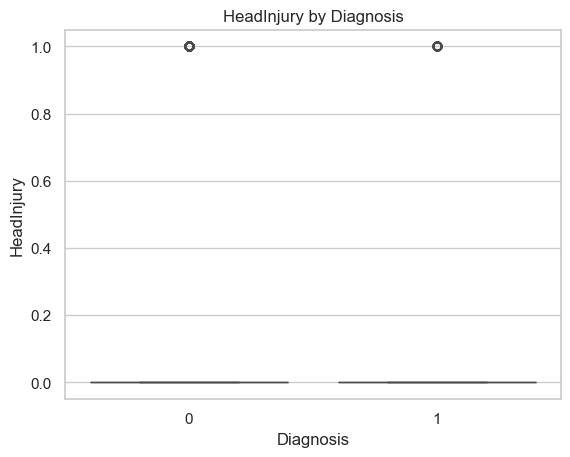

Plot saved to: ../plots/HeadInjury_boxplot.png
Caption saved to: ../plots/HeadInjury_boxplot.txt


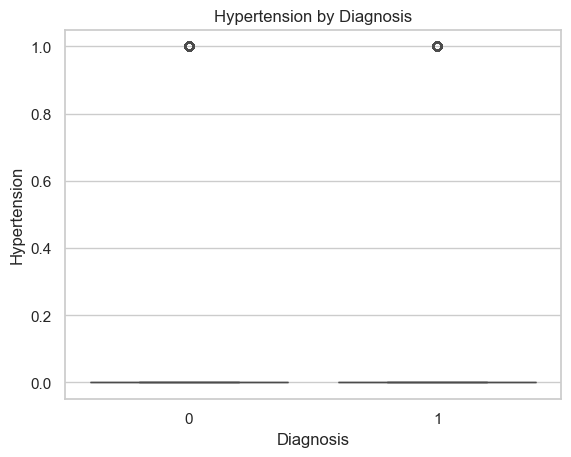

Plot saved to: ../plots/Hypertension_boxplot.png
Caption saved to: ../plots/Hypertension_boxplot.txt


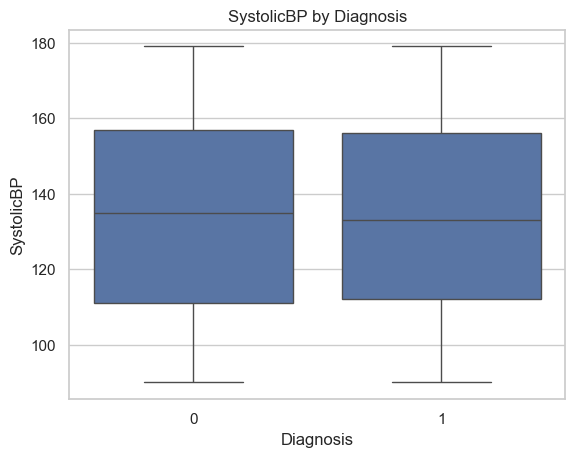

Plot saved to: ../plots/SystolicBP_boxplot.png
Caption saved to: ../plots/SystolicBP_boxplot.txt


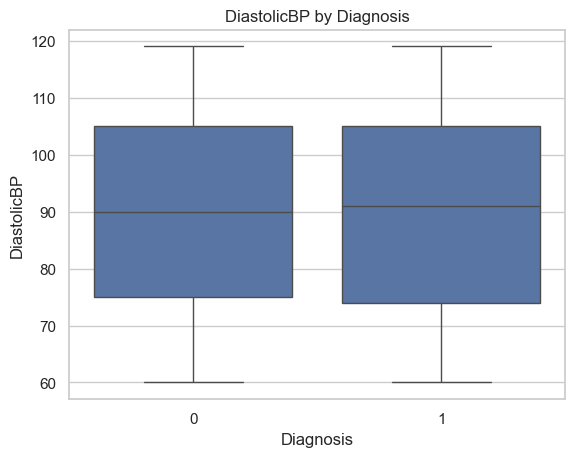

Plot saved to: ../plots/DiastolicBP_boxplot.png
Caption saved to: ../plots/DiastolicBP_boxplot.txt


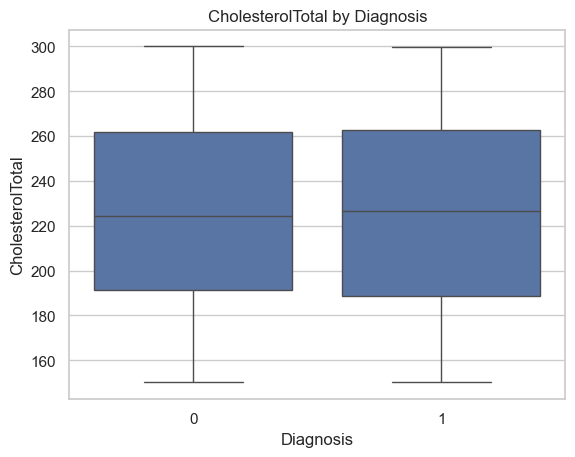

Plot saved to: ../plots/CholesterolTotal_boxplot.png
Caption saved to: ../plots/CholesterolTotal_boxplot.txt


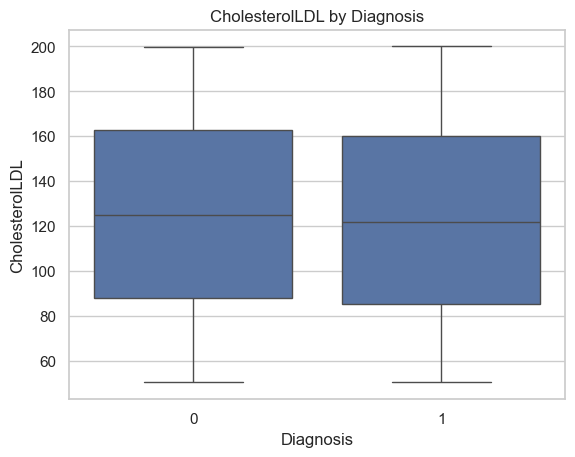

Plot saved to: ../plots/CholesterolLDL_boxplot.png
Caption saved to: ../plots/CholesterolLDL_boxplot.txt


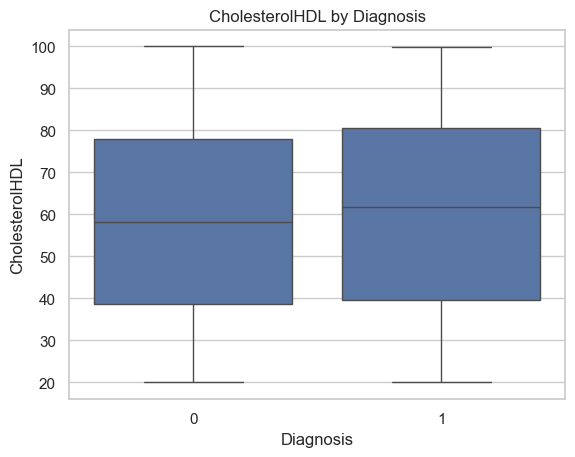

Plot saved to: ../plots/CholesterolHDL_boxplot.png
Caption saved to: ../plots/CholesterolHDL_boxplot.txt


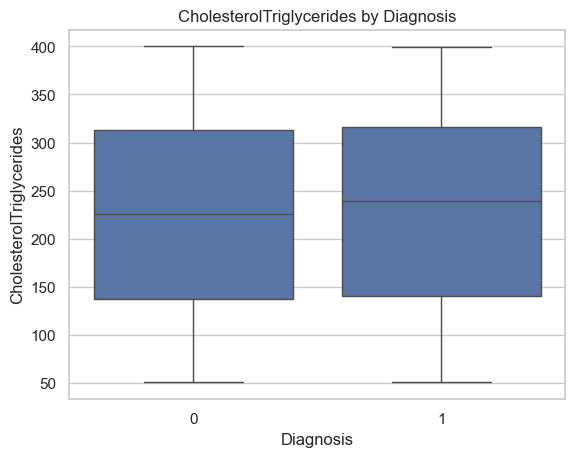

Plot saved to: ../plots/CholesterolTriglycerides_boxplot.png
Caption saved to: ../plots/CholesterolTriglycerides_boxplot.txt


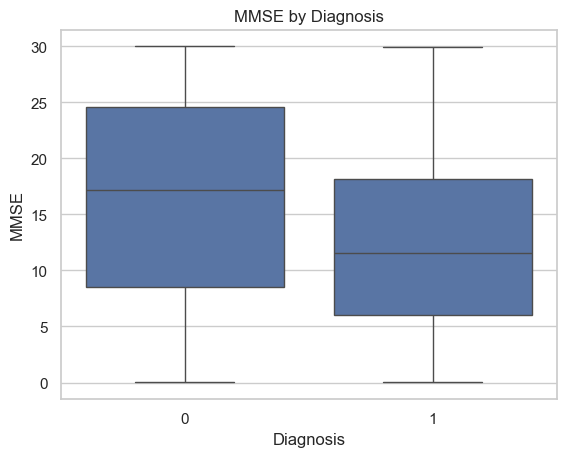

Plot saved to: ../plots/MMSE_boxplot.png
Caption saved to: ../plots/MMSE_boxplot.txt


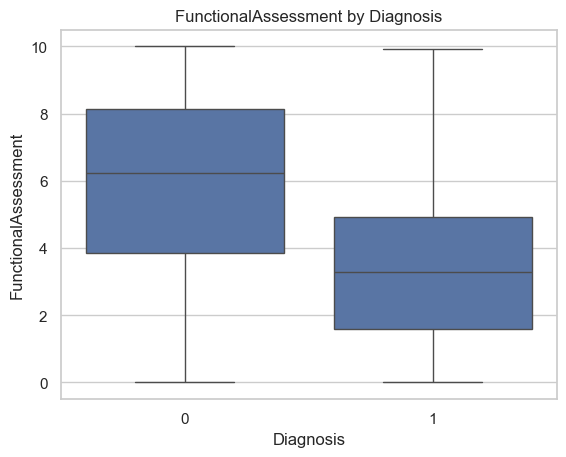

Plot saved to: ../plots/FunctionalAssessment_boxplot.png
Caption saved to: ../plots/FunctionalAssessment_boxplot.txt


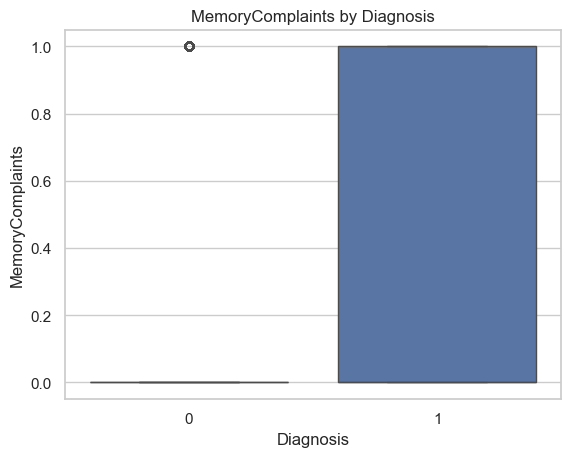

Plot saved to: ../plots/MemoryComplaints_boxplot.png
Caption saved to: ../plots/MemoryComplaints_boxplot.txt


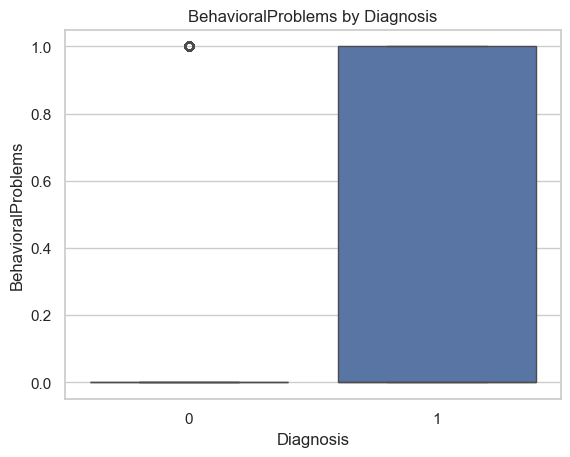

Plot saved to: ../plots/BehavioralProblems_boxplot.png
Caption saved to: ../plots/BehavioralProblems_boxplot.txt


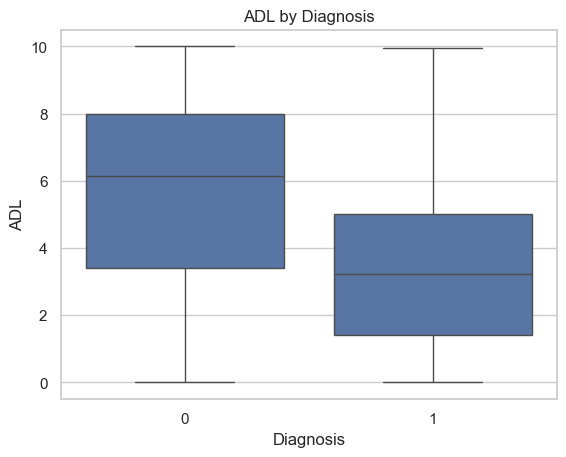

Plot saved to: ../plots/ADL_boxplot.png
Caption saved to: ../plots/ADL_boxplot.txt


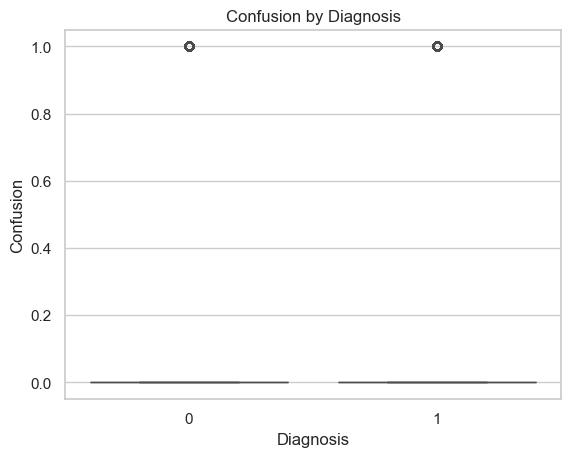

Plot saved to: ../plots/Confusion_boxplot.png
Caption saved to: ../plots/Confusion_boxplot.txt


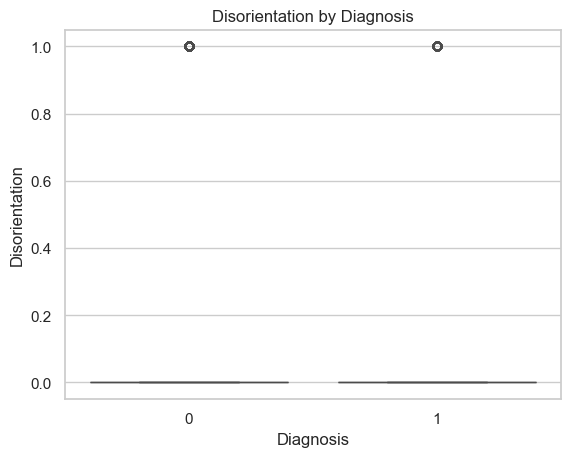

Plot saved to: ../plots/Disorientation_boxplot.png
Caption saved to: ../plots/Disorientation_boxplot.txt


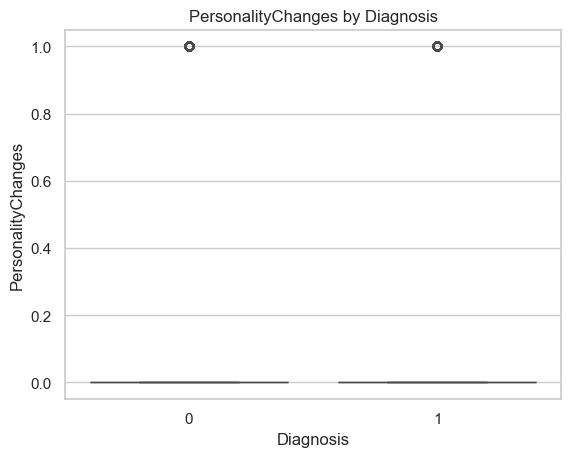

Plot saved to: ../plots/PersonalityChanges_boxplot.png
Caption saved to: ../plots/PersonalityChanges_boxplot.txt


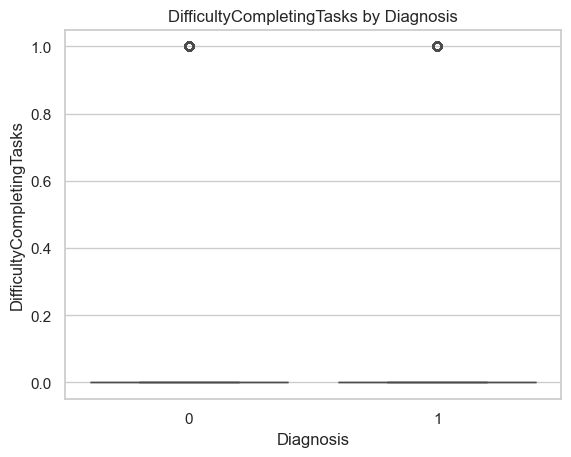

Plot saved to: ../plots/DifficultyCompletingTasks_boxplot.png
Caption saved to: ../plots/DifficultyCompletingTasks_boxplot.txt


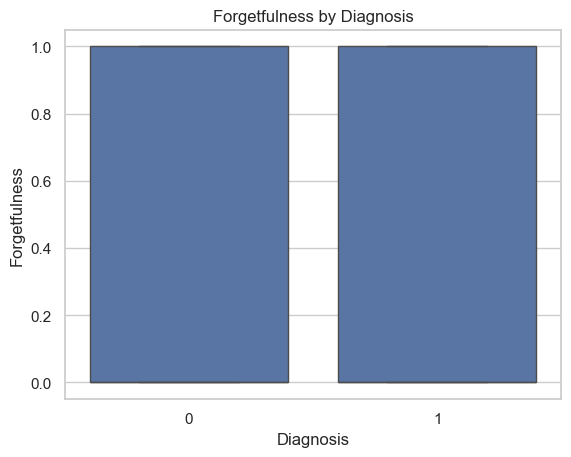

Plot saved to: ../plots/Forgetfulness_boxplot.png
Caption saved to: ../plots/Forgetfulness_boxplot.txt


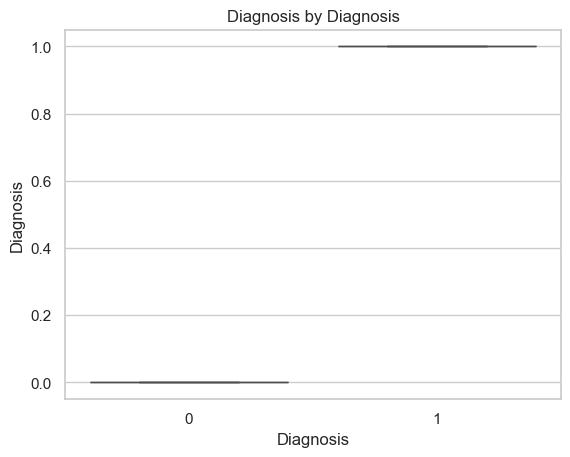

Plot saved to: ../plots/Diagnosis_boxplot.png
Caption saved to: ../plots/Diagnosis_boxplot.txt


In [130]:
# Create boxplots for each numeric feature grouped by diagnosis
for col in numeric_cols:
    fig, ax = plt.subplots()
    sns.boxplot(x="Diagnosis", y=col, data=df, ax=ax)
    ax.set_title(f"{col} by Diagnosis")
    plt.show()
    save_plot(fig, f"{col}_boxplot.png", caption=f"Boxplot of {col} by diagnosis group")

#### Full Overview

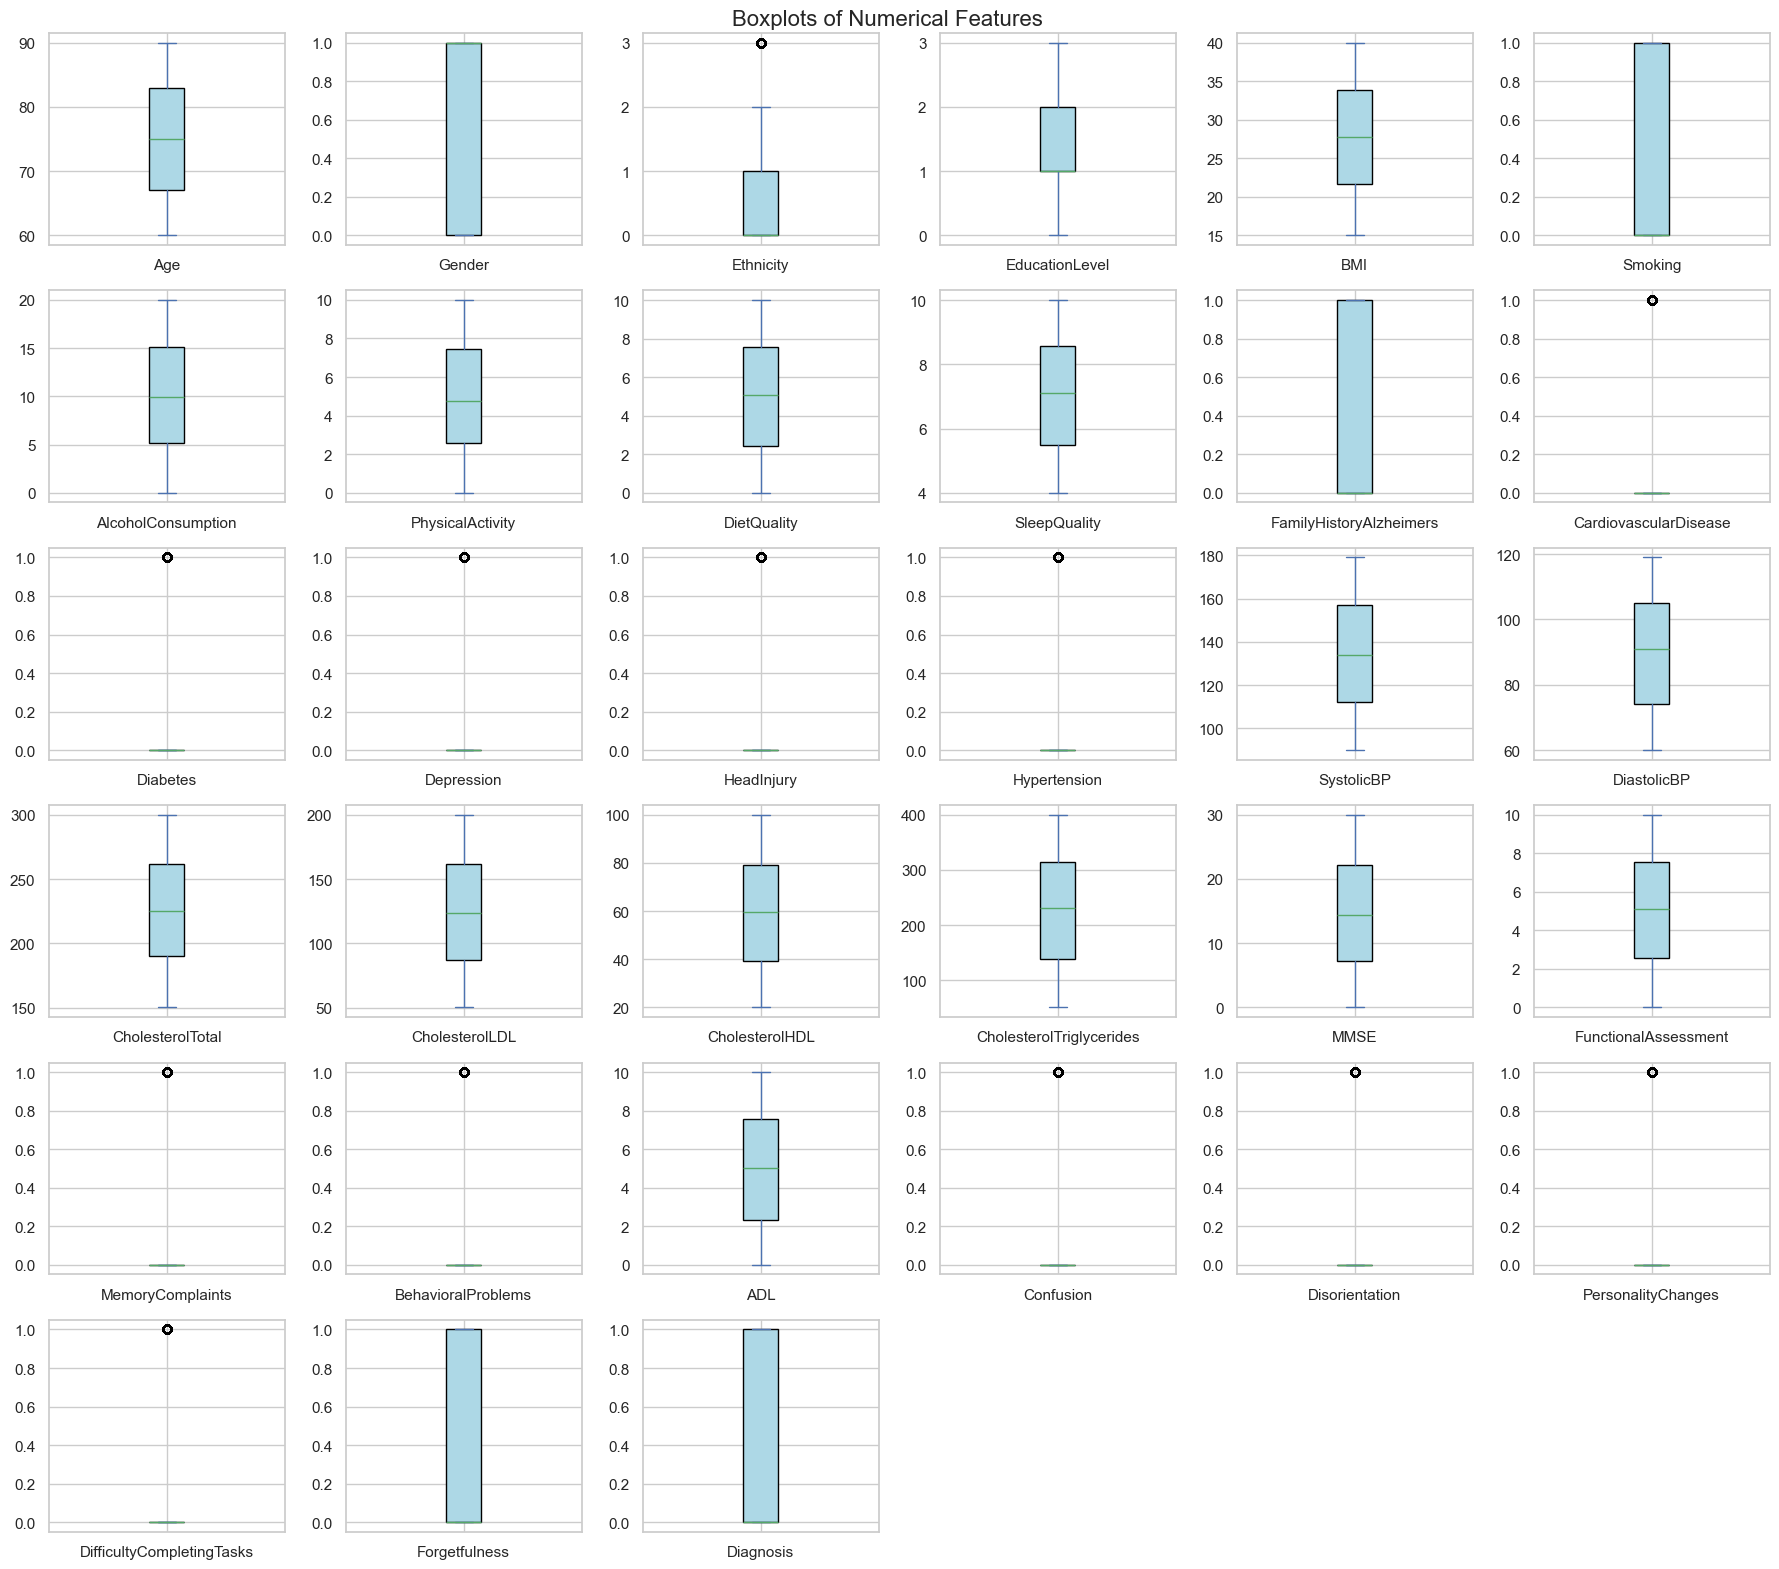

In [133]:
# Boxplot grid for numerical features
df.select_dtypes(include=['int64', 'float64']).plot(kind='box', subplots=True, layout=(6,6), figsize=(18, 16), patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.suptitle("Boxplots of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

### Output

The boxplots give us a clear visual summary of how each feature is spread out and whether any outliers are present. This is helpful for spotting unusual values that could affect the performance of machine learning models later in the project.

- Most features, like Age, MMSE, and SystolicBP, show a consistent spread with just a few outliers. This suggests that the data is generally clean and well-behaved.
- Some features, such as CholesterolTriglycerides, CholesterolLDL, and PhysicalActivity, have a few high values that stand out. These could be real cases (for example, a patient with high cholesterol or very active habits) rather than errors.
- Binary features like Depression, Smoking, and HeadInjury mostly show the expected two values (0 and 1). A few of these show small dots above or below the main bar, but that is normal in this kind of data.
- Functional features like ADL and FunctionalAssessment show a drop in scores for some patients. This makes sense in the context of Alzheimer’s, since lower values here reflect reduced independence or functioning.
- Symptom-related features like MemoryComplaints, Confusion, and Disorientation also show variation between patients. This will be important for understanding early warning signs and prediction.

Overall, the boxplots confirm that there are no serious outliers that need to be removed. The data looks clean, with good variation across most features. This supports our decision to move forward with modeling in the next notebook.


-----------------------------

## Target Variable: Diagnosis

Numeric columns: ['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']
Diagnosis distribution:
Diagnosis
0    1389
1     760
Name: count, dtype: int64


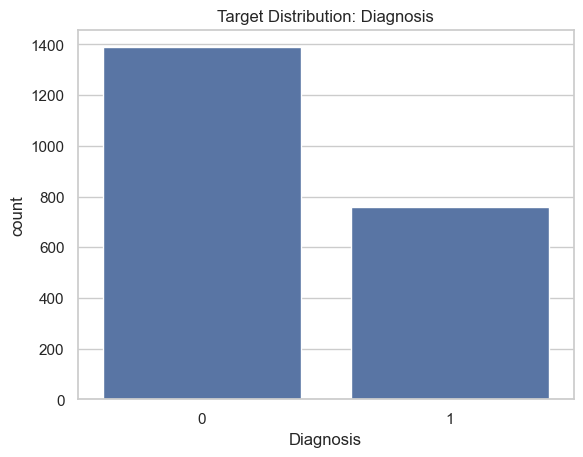

Plot saved to: ../plots/Diagnosis_distribution.png
Caption saved to: ../plots/Diagnosis_distribution.txt


In [94]:
# Define the target column
target_column = "Diagnosis"

# Identify numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print(f"Numeric columns: {numeric_cols}")

# Display class counts
print("Diagnosis distribution:")
print(df[target_column].value_counts())

# Plot the distribution
fig, ax = plt.subplots()
sns.countplot(x=target_column, data=df, ax=ax)
ax.set_title(f"Target Distribution: {target_column}")
plt.show()

# Save plot for Streamlit/app use
save_plot(fig, f"{target_column}_distribution.png", caption="Distribution of Alzheimer’s diagnosis categories")

### Output
The target variable in this dataset is Diagnosis, where 0 represents patients who have not been diagnosed with Alzheimer’s and 1 represents patients who have been diagnosed. From the distribution plot and count summary, we observe the following:

- 1,389 patients are not diagnosed with Alzheimer’s (Diagnosis = 0)

- 760 patients are diagnosed with Alzheimer’s (Diagnosis = 1)

This indicates that the dataset is slightly imbalanced, with more cases in the non-diagnosed class. Although the imbalance is not severe, it is important to keep this in mind when building and evaluating machine learning models in Notebook 04. Knowing how many samples exist in each class helps us choose appropriate training and evaluation methods. For example, we may consider using stratified sampling to preserve class proportions or apply evaluation metrics like balanced accuracy to ensure that the model performs fairly for both diagnosed and non-diagnosed patients.

--------------------

In [ ]:
## Grouped Statistics by Target

In [128]:
# Mean values by target class
grouped_means = df.groupby(target_column)[numeric_cols].mean().T
display(grouped_means)

Diagnosis,0,1
Age,74.945284,74.842105
Gender,0.514039,0.492105
Ethnicity,0.708423,0.677632
EducationLevel,1.316055,1.232895
BMI,27.515092,27.912670
Smoking,0.290137,0.285526
AlcoholConsumption,10.071880,9.980156
PhysicalActivity,4.907640,4.943160
DietQuality,4.974839,5.026581
SleepQuality,7.124832,6.916292


## Correlation Matrix

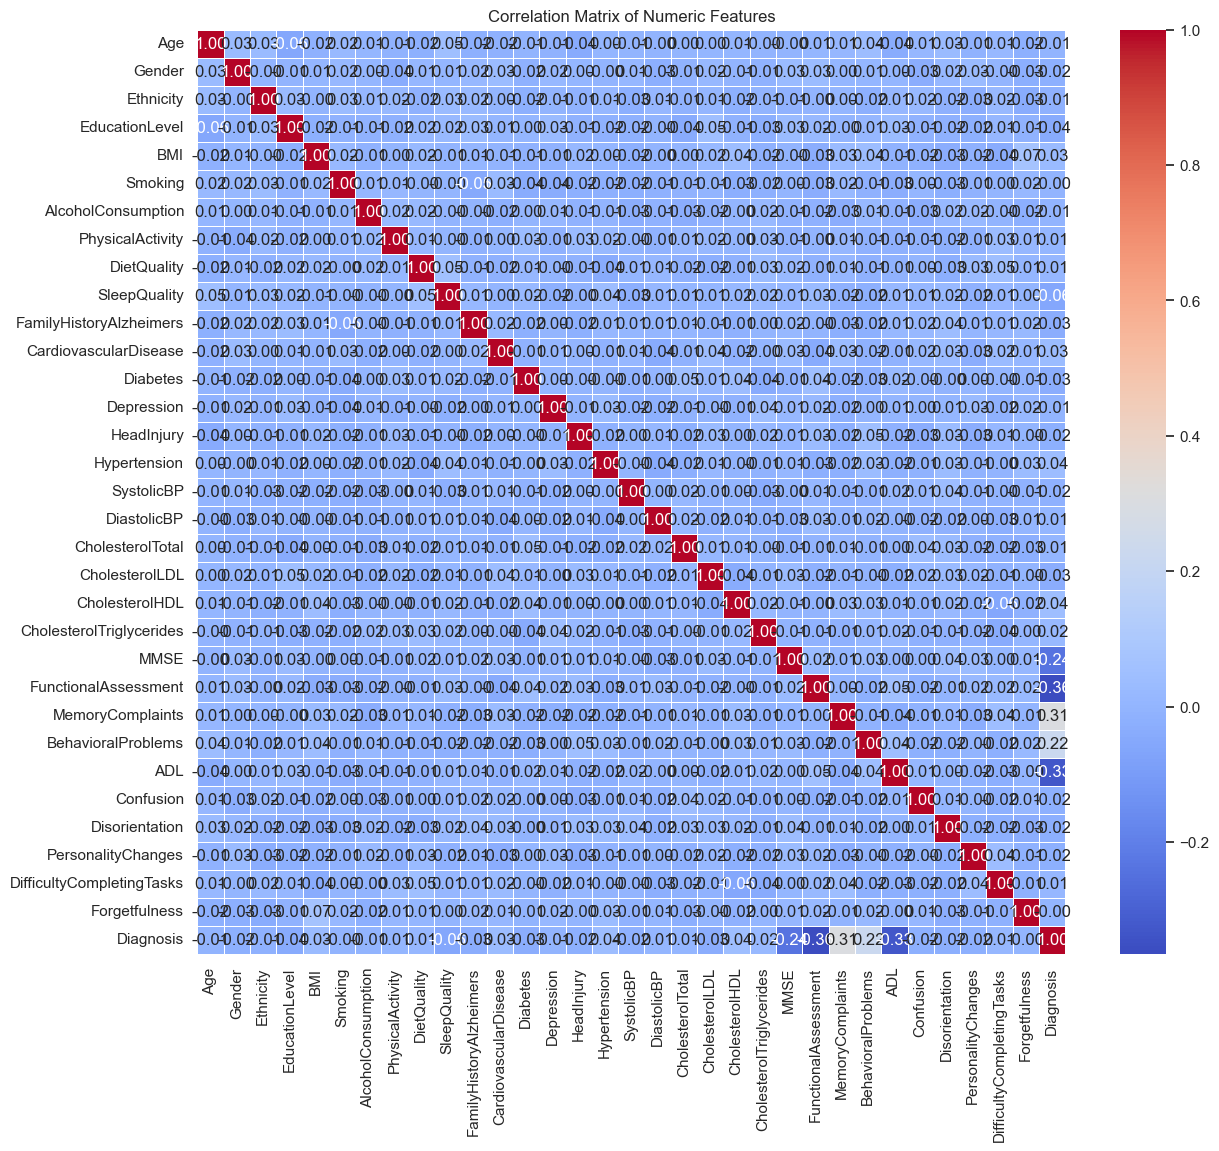

Plot saved to: ../plots/correlation_matrix.png
Caption saved to: ../plots/correlation_matrix.txt


In [143]:
# Calculate correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, ax=ax)
ax.set_title("Correlation Matrix of Numeric Features")
plt.show()

# Save plot
save_plot(fig, "correlation_matrix.png", caption="Heatmap showing correlation between numeric features")

### Output

The correlation matrix helps us understand how different features in the dataset relate to each other. Each number shows the strength and direction of the relationship between two variables, with values closer to 1 or -1 indicating stronger correlation.

- Most features are only weakly correlated with each other, which is a good sign. It means the dataset has low redundancy, and each feature may bring unique information to the model.
- Some of the stronger correlations are between clinical measures. For example, CholesterolTotal, CholesterolLDL, and CholesterolTriglycerides are moderately correlated, which makes sense because these are related health indicators.
- MMSE shows a moderate negative correlation with CDR and symptoms like MemoryComplaints and Confusion. This supports Hypothesis 2 — lower MMSE scores are linked with higher cognitive impairment.
- FunctionalAssessment and ADL are also positively correlated, meaning as one measure of functional ability drops, so does the other. These could both help the model detect changes in patient independence.
- Diagnosis has small but meaningful correlations with MMSE, ADL, and symptom-related features like Forgetfulness and DifficultyCompletingTasks. These relationships suggest that these features might be useful for predicting whether someone is diagnosed with Alzheimer’s.
- Most lifestyle and medical history features show weak or no strong correlation with other variables. This is helpful, as it means they can be included in the model without much concern for multicollinearity.

Overall, the correlation matrix shows that our features are fairly independent, and many of them have at least a small connection to the diagnosis variable. This confirms that we have a good mix of features for training a machine learning model in the next notebook.


In [ ]:
-----------------------------

#### Detect Outliers Using IQR

In [59]:
def detect_outliers_iqr(df_clean, columns):
    """
    Returns a DataFrame of rows considered outliers in any specified column using IQR method.
    """
    outlier_indices = []

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)].index
        outlier_indices.extend(outliers)

    outlier_indices = list(set(outlier_indices))
    return df_clean.loc[outlier_indices]

#### View and Count Outliers

In [62]:
# Detect outliers in numeric columns
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
outliers_df = detect_outliers_iqr(df_clean, numeric_cols)

print(f"Total rows with outliers: {outliers_df.shape[0]}")
outliers_df.head()


Total rows with outliers: 1895


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0
5,86,1,1,1,30.626886,0,4.140144,0.211062,1.584922,7.261953,0,0,1,0,0,0,168,62,280.712539,198.334629,79.080503,263.943655,27.517529,5.510144,0,0,9.015686,1,0,0,0,0,0


#### Remove Outliers

In [66]:
# Remove detected outliers
df_no_outliers = df_clean.drop(outliers_df.index)

print(f"Shape after removing outliers: {df_no_outliers.shape}")


Shape after removing outliers: (254, 33)


#### Save dataset

In [70]:
# Save outlier-free data
df_no_outliers.to_csv("../data/alzheimers_no_outliers.csv", index=False)


#### Correlation Matrix

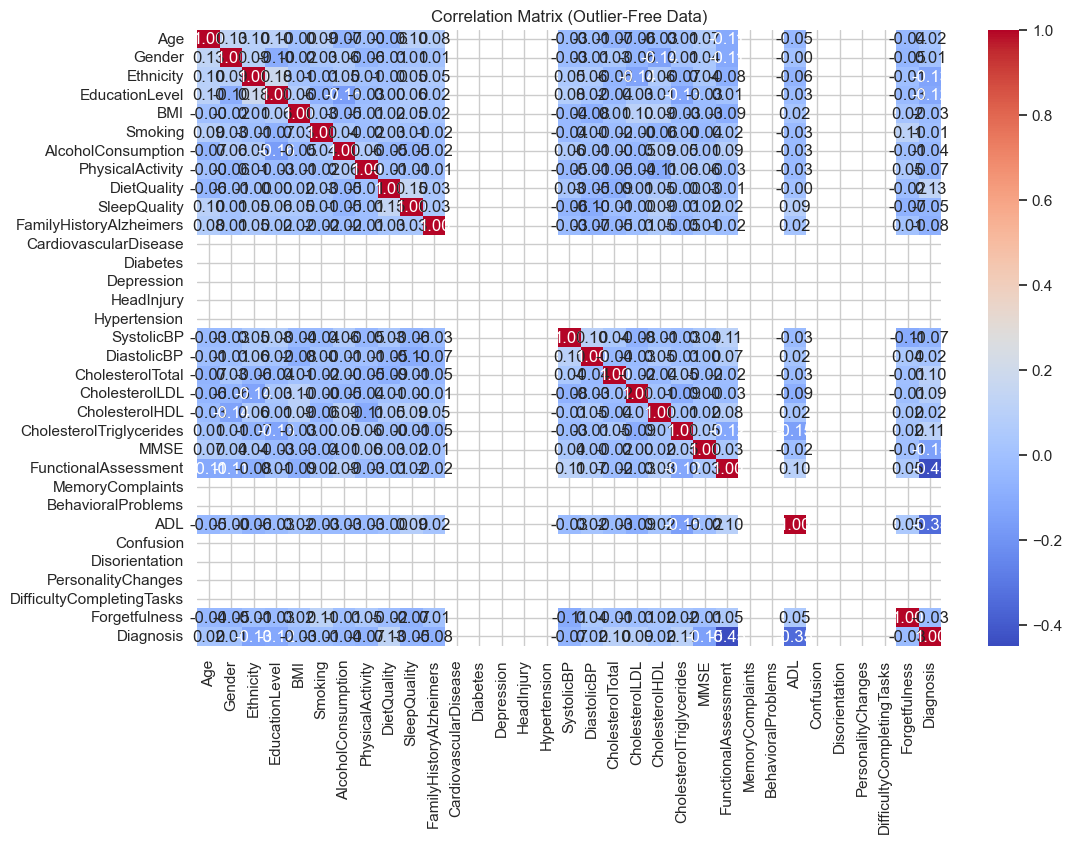

In [75]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_no_outliers.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Outlier-Free Data)")
plt.show()

#### Pairplot for Highly Correlated Features

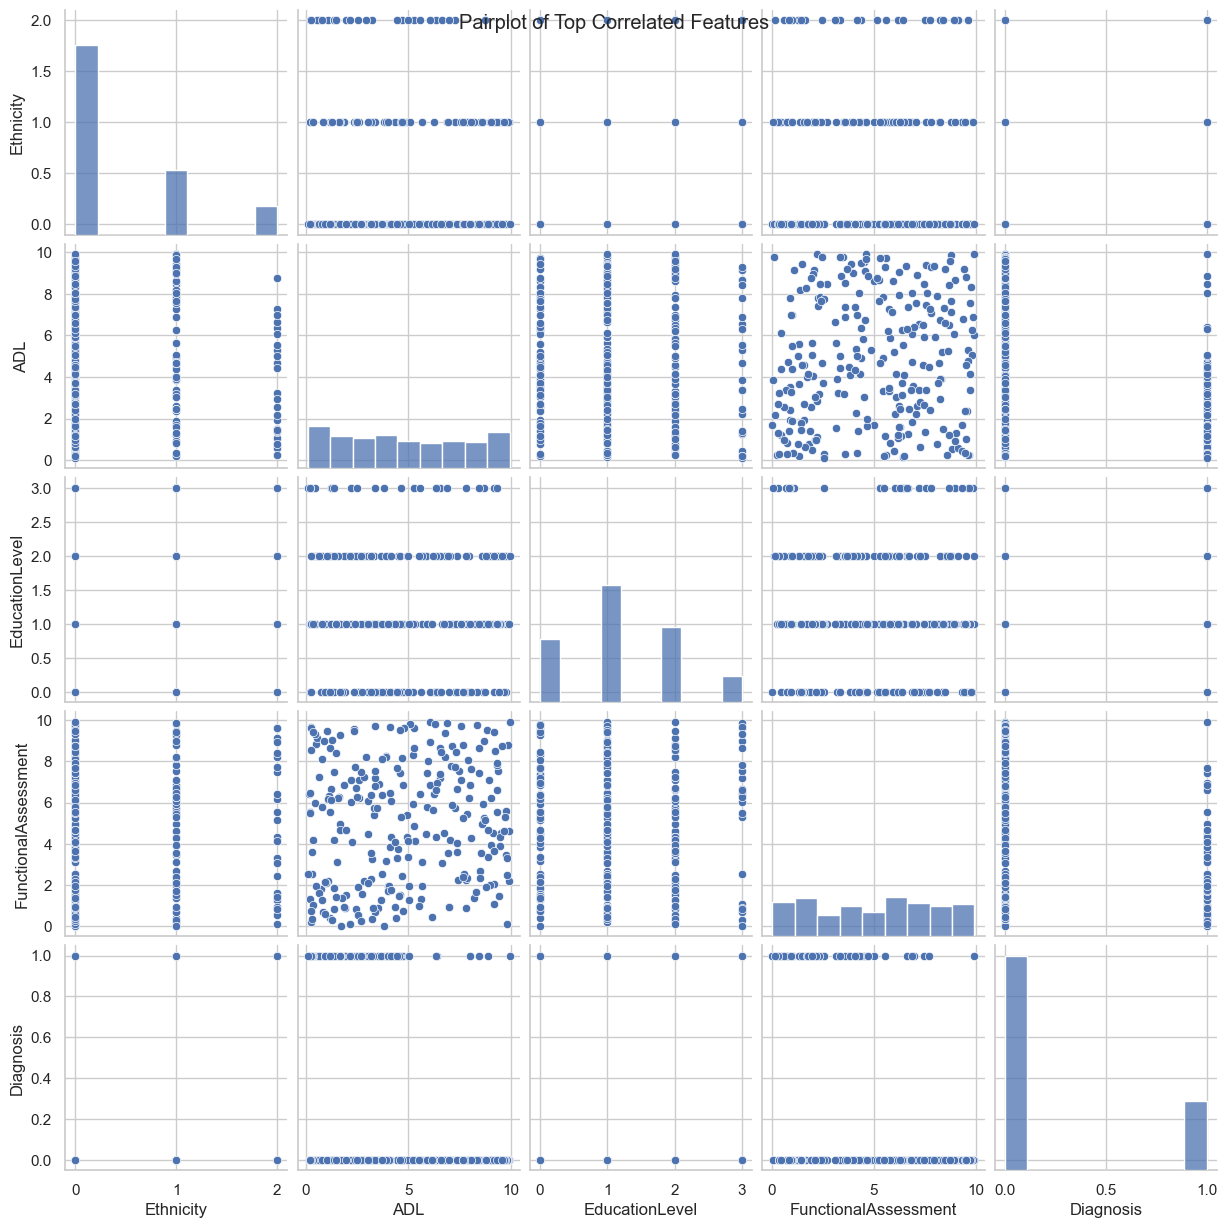

In [79]:
# Select top correlated variables for pairplot
corr_matrix = df_no_outliers.corr(numeric_only=True)
top_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
top_pairs = top_corr[(top_corr < 1.0)].drop_duplicates().head(3)

cols = list(set([i for pair in top_pairs.index for i in pair]))
sns.pairplot(df_no_outliers[cols])
plt.suptitle("Pairplot of Top Correlated Features")
plt.show()

## Pairplots of Key Features

In [ ]:
Visualize how combinations of top features relate to Diagnosis.
Especially good for visual intuition of separation between diagnosed and non-diagnosed.

In [87]:
import seaborn as sns

# Chosen features for visualization
pairplot_features = ['MMSE', 'Age', 'DietQuality', 'PhysicalActivity', 'Diagnosis']

# Plot pairplot
sns.pairplot(df[pairplot_features], hue='Diagnosis', plot_kws={"alpha": 0.5})
plt.suptitle("Pairplot of Selected Features by Diagnosis", y=1.02)
plt.show()

NameError: name 'df' is not defined

## Cross-tab or Barplot for Binary Features

In [ ]:
Visualize how binary indicators (e.g. Depression, Smoking) differ by Diagnosis.

    use case: Tests H2 and H3 by seeing if certain conditions are more common in diagnosed group

In [91]:
binary_cols = ['FamilyHistoryAlzheimers', 'Depression', 'Hypertension', 'Smoking']
for col in binary_cols:
    sns.countplot(data=df, x=col, hue='Diagnosis')
    plt.title(f"{col} by Diagnosis")
    plt.show()

NameError: name 'df' is not defined

In [ ]:
## Check Class Balance Across Groups

In [ ]:
import seaborn as sns

for col in ['MMSE', 'ADL', 'Age', 'PhysicalActivity', 'DietQuality']:
    sns.boxplot(data=df, x='Diagnosis', y=col)
    plt.title(f'{col} by Diagnosis')
    plt.show()

In [ ]:
## Multicollinearity Check

#### Feature Scaling

In [83]:
# Standardize numeric columns
scaler = StandardScaler()
df_scaled = df_no_outliers.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_no_outliers[numeric_cols])

NameError: name 'StandardScaler' is not defined

## Selected Features for Modeling

In [ ]:
# Define features selected for machine learning
selected_features = [
    'MMSE', 'FunctionalAssessment', 'ADL',
    'Age', 'Gender', 'EducationLevel',
    'DietQuality', 'PhysicalActivity', 'SleepQuality',
    'FamilyHistoryAlzheimers', 'Depression', 'Hypertension',
    'MemoryComplaints', 'Forgetfulness', 'Disorientation'
]

print(f"Selected features ({len(selected_features)}):")
print(selected_features)


## Notebook Summary

In [ ]:
In this notebook, we explored patterns in the Alzheimer’s dataset to prepare for machine learning. We used histograms, boxplots, correlation analysis, and grouped statistics to identify meaningful features and check for outliers.

The analysis supported all three of our hypotheses:
- H1: Older age is associated with higher Alzheimer’s risk
- H2: Lower MMSE scores and reduced functional ability are strong indicators of diagnosis
- H3: Healthier lifestyle factors may relate to lower risk

Based on these insights, we selected a list of important features that will be used for training in the next notebook. Our goal in Notebook 04 is to build classification models to predict Alzheimer’s diagnosis and understand which features contribute most to prediction.

In [ ]:
from utils.save_tools import save_notebook_and_summary

eda_summary = {
    "notebook": "03_Exploratory_Data_Analysis",
    "description": "Explored cleaned Alzheimer’s dataset to analyze feature distributions, target class balance, and relationships.",
    "key_findings": {
        "class_distribution": {"non_diagnosed": 1389, "diagnosed": 760},
        "top_features": selected_features,
        "patterns": [
            "MMSE is lower in diagnosed patients",
            "PhysicalActivity and DietQuality show small differences",
            "Memory-related symptoms occur more in diagnosed group"
        ]
    },
    "hypotheses_supported": ["H1", "H2", "H3"],
    "next_step": "Train classification models to predict Diagnosis"
}

save_notebook_and_summary("03_Exploratory_Data_Analysis", eda_summary)
